# **Vendor Performance Analysis**
## **Business Problem -**
Effective inventory and sales management are critical for optimizing the profitability in retail and the whole industry. Companies need to ensure that they are not incurring losses due to inefficient pricing, poor inventory turnover, or vendor dependency.

## **Objective -**
The goal of this analysis is to :-

* Identifying underperformance brands that need promotion or pricing adjustments.
* Determine the top vendors contributing to sales and gross profit.
* Analyze the impact of bulk purchasing on unit cost.
* Assess inventory turnover to reduce holding cost and improve efficiency.
* Investigate the profitability variance between high performing and low performing vendors.
## **Importing Libraries and Loading Dataset**

In [1]:
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
file_id = "19FrxBvZwjka8wnvAyZhw8U5KH4ISA-ZK"
begin_inventory_file_path = f"https://drive.google.com/uc?export=download&id={file_id}"

begin_inventory = pl.read_csv(begin_inventory_file_path)
begin_inventory

InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
str,i64,str,i64,str,str,i64,f64,str
"""1_HARDERSFIELD_58""",1,"""HARDERSFIELD""",58,"""Gekkeikan Black & Gold Sake""","""750mL""",8,12.99,"""2024-01-01"""
"""1_HARDERSFIELD_60""",1,"""HARDERSFIELD""",60,"""Canadian Club 1858 VAP""","""750mL""",7,10.99,"""2024-01-01"""
"""1_HARDERSFIELD_62""",1,"""HARDERSFIELD""",62,"""Herradura Silver Tequila""","""750mL""",6,36.99,"""2024-01-01"""
"""1_HARDERSFIELD_63""",1,"""HARDERSFIELD""",63,"""Herradura Reposado Tequila""","""750mL""",3,38.99,"""2024-01-01"""
"""1_HARDERSFIELD_72""",1,"""HARDERSFIELD""",72,"""No. 3 London Dry Gin""","""750mL""",6,34.99,"""2024-01-01"""
…,…,…,…,…,…,…,…,…
"""79_BALLYMENA_46985""",79,"""BALLYMENA""",46985,"""Rodney Strong Cab Svgn Alexa""","""750mL""",13,22.99,"""2024-01-01"""
"""79_BALLYMENA_47014""",79,"""BALLYMENA""",47014,"""Juan Gil Jumilla Rd""","""750mL""",13,13.99,"""2024-01-01"""
"""79_BALLYMENA_47090""",79,"""BALLYMENA""",47090,"""Napa Cellars Cab Svgn Napa""","""750mL""",19,23.99,"""2024-01-01"""


In [3]:
end_file_id = "1ebcvARzBEBkrPZGjOaTCoj2CvegZfu5g"
end_inventory_file_path = f"https://drive.google.com/uc?export=download&id={end_file_id}"

end_inventory = pl.read_csv(end_inventory_file_path)
end_inventory

InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
str,i64,str,i64,str,str,i64,f64,str
"""1_HARDERSFIELD_58""",1,"""HARDERSFIELD""",58,"""Gekkeikan Black & Gold Sake""","""750mL""",11,12.99,"""2024-12-31"""
"""1_HARDERSFIELD_62""",1,"""HARDERSFIELD""",62,"""Herradura Silver Tequila""","""750mL""",7,36.99,"""2024-12-31"""
"""1_HARDERSFIELD_63""",1,"""HARDERSFIELD""",63,"""Herradura Reposado Tequila""","""750mL""",7,38.99,"""2024-12-31"""
"""1_HARDERSFIELD_72""",1,"""HARDERSFIELD""",72,"""No. 3 London Dry Gin""","""750mL""",4,34.99,"""2024-12-31"""
"""1_HARDERSFIELD_75""",1,"""HARDERSFIELD""",75,"""Three Olives Tomato Vodka""","""750mL""",7,14.99,"""2024-12-31"""
…,…,…,…,…,…,…,…,…
"""81_PEMBROKE_90087""",81,"""PEMBROKE""",90087,"""Ch Mouton Rothschild 12 Paui""","""750mL""",3,469.99,"""2024-12-31"""
"""81_PEMBROKE_90088""",81,"""PEMBROKE""",90088,"""Ch Le Petite Mouton 12 Pauil""","""750mL""",3,134.99,"""2024-12-31"""
"""81_PEMBROKE_90089""",81,"""PEMBROKE""",90089,"""Ch Lynch Bages 12 Pauillac""","""750mL""",3,119.99,"""2024-12-31"""


In [4]:
purchase_prices_file_id = "163JZ0VVSBBVoXHLx2Hl1r5hqZkQwOVF9"
purchase_prices_file_path = f"https://drive.google.com/uc?export=download&id={purchase_prices_file_id}"

purchase_prices = pd.read_csv(purchase_prices_file_path)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.
...,...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS


In [5]:
vendor_invoices_file_id = "1owK2YhFHYX05h-d_VpgyVHYLzwcNRSVy"
vendor_invoices_file_path = f"https://drive.google.com/uc?export=download&id={vendor_invoices_file_id}"

vendor_invoices = pl.read_csv(vendor_invoices_file_path)
vendor_invoices

VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
i64,str,str,i64,str,str,i64,f64,f64,str
105,"""ALTAMAR BRANDS LLC ""","""2024-01-04""",8124,"""2023-12-21""","""2024-02-16""",6,214.26,3.47,null
4466,"""AMERICAN VINTAGE BEVERAGE ""","""2024-01-07""",8137,"""2023-12-22""","""2024-02-21""",15,140.55,8.57,null
388,"""ATLANTIC IMPORTING COMPANY ""","""2024-01-09""",8169,"""2023-12-24""","""2024-02-16""",5,106.6,4.61,null
480,"""BACARDI USA INC ""","""2024-01-12""",8106,"""2023-12-20""","""2024-02-05""",10100,137483.78,2935.2,null
516,"""BANFI PRODUCTS CORP ""","""2024-01-07""",8170,"""2023-12-24""","""2024-02-12""",1935,15527.25,429.2,null
…,…,…,…,…,…,…,…,…,…
9622,"""WEIN BAUER INC ""","""2025-01-06""",13626,"""2024-12-21""","""2025-02-10""",90,1563.0,8.6,null
9625,"""WESTERN SPIRITS BEVERAGE CO""","""2025-01-10""",13661,"""2024-12-23""","""2025-02-18""",4617,37300.48,186.5,null
3664,"""WILLIAM GRANT & SONS INC ""","""2025-01-02""",13643,"""2024-12-22""","""2025-02-04""",9848,202815.78,932.95,null


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
sales = pl.read_csv("/content/drive/MyDrive/Vendor_data/sales.csv")
sales

InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
str,i64,i64,str,str,i64,f64,f64,str,f64,i64,f64,i64,str
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",1,16.49,16.49,"""2024-01-01""",750.0,1,0.79,12546,"""JIM BEAM BRANDS COMPANY """
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",2,32.98,16.49,"""2024-01-02""",750.0,1,1.57,12546,"""JIM BEAM BRANDS COMPANY """
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",1,16.49,16.49,"""2024-01-03""",750.0,1,0.79,12546,"""JIM BEAM BRANDS COMPANY """
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",1,14.49,14.49,"""2024-01-08""",750.0,1,0.79,12546,"""JIM BEAM BRANDS COMPANY """
"""1_HARDERSFIELD_1005""",1,1005,"""Maker's Mark Combo Pack""","""375mL 2 Pk""",2,69.98,34.99,"""2024-01-09""",375.0,1,0.79,12546,"""JIM BEAM BRANDS COMPANY """
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""9_BLACKPOOL_984""",9,984,"""Patron XO Cafe Liqueur""","""750mL""",1,25.99,25.99,"""2024-12-17""",750.0,1,0.79,9165,"""ULTRA BEVERAGE COMPANY LLP """
"""9_BLACKPOOL_984""",9,984,"""Patron XO Cafe Liqueur""","""750mL""",1,25.99,25.99,"""2024-12-21""",750.0,1,0.79,9165,"""ULTRA BEVERAGE COMPANY LLP """
"""9_BLACKPOOL_984""",9,984,"""Patron XO Cafe Liqueur""","""750mL""",3,77.97,25.99,"""2024-12-23""",750.0,1,2.36,9165,"""ULTRA BEVERAGE COMPANY LLP """


In [8]:
purchases = pl.read_csv("/content/drive/MyDrive/Vendor_data/purchases.csv")

purchases

InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
str,i64,i64,str,str,i64,str,i64,str,str,str,str,f64,i64,f64,i64
"""69_MOUNTMEND_8412""",69,8412,"""Tequila Ocho Plata Fresno""","""750mL""",105,"""ALTAMAR BRANDS LLC """,8124,"""2023-12-21""","""2024-01-02""","""2024-01-04""","""2024-02-16""",35.71,6,214.26,1
"""30_CULCHETH_5255""",30,5255,"""TGI Fridays Ultimte Mudslide""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE """,8137,"""2023-12-22""","""2024-01-01""","""2024-01-07""","""2024-02-21""",9.35,4,37.4,1
"""34_PITMERDEN_5215""",34,5215,"""TGI Fridays Long Island Iced""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE """,8137,"""2023-12-22""","""2024-01-02""","""2024-01-07""","""2024-02-21""",9.41,5,47.05,1
"""1_HARDERSFIELD_5255""",1,5255,"""TGI Fridays Ultimte Mudslide""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE """,8137,"""2023-12-22""","""2024-01-01""","""2024-01-07""","""2024-02-21""",9.35,6,56.1,1
"""76_DONCASTER_2034""",76,2034,"""Glendalough Double Barrel""","""750mL""",388,"""ATLANTIC IMPORTING COMPANY """,8169,"""2023-12-24""","""2024-01-02""","""2024-01-09""","""2024-02-16""",21.32,5,106.6,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""49_GARIGILL_22298""",49,22298,"""Zorvino Vyds Sangiovese""","""750mL""",90058,"""ZORVINO VINEYARDS """,13593,"""2024-12-19""","""2024-12-28""","""2025-01-09""","""2025-02-06""",8.06,12,96.72,2
"""1_HARDERSFIELD_19556""",1,19556,"""Zorvino Bacca Z Blackberry""","""750mL""",90058,"""ZORVINO VINEYARDS """,13593,"""2024-12-19""","""2024-12-27""","""2025-01-09""","""2025-02-06""",9.39,12,112.68,2
"""66_EANVERNESS_22297""",66,22297,"""Zorvino Vyds Pearz""","""750mL""",90058,"""ZORVINO VINEYARDS """,13593,"""2024-12-19""","""2024-12-26""","""2025-01-09""","""2025-02-06""",6.75,12,81.0,2


## **Read datasets And Data Cleaning**
### **Table 1 : begin_inventory**

In [9]:
begin_inventory.head()

InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
str,i64,str,i64,str,str,i64,f64,str
"""1_HARDERSFIELD_58""",1,"""HARDERSFIELD""",58,"""Gekkeikan Black & Gold Sake""","""750mL""",8,12.99,"""2024-01-01"""
"""1_HARDERSFIELD_60""",1,"""HARDERSFIELD""",60,"""Canadian Club 1858 VAP""","""750mL""",7,10.99,"""2024-01-01"""
"""1_HARDERSFIELD_62""",1,"""HARDERSFIELD""",62,"""Herradura Silver Tequila""","""750mL""",6,36.99,"""2024-01-01"""
"""1_HARDERSFIELD_63""",1,"""HARDERSFIELD""",63,"""Herradura Reposado Tequila""","""750mL""",3,38.99,"""2024-01-01"""
"""1_HARDERSFIELD_72""",1,"""HARDERSFIELD""",72,"""No. 3 London Dry Gin""","""750mL""",6,34.99,"""2024-01-01"""


In [10]:
begin_inventory.schema

Schema([('InventoryId', String),
        ('Store', Int64),
        ('City', String),
        ('Brand', Int64),
        ('Description', String),
        ('Size', String),
        ('onHand', Int64),
        ('Price', Float64),
        ('startDate', String)])

In [11]:
begin_inventory.shape

(206529, 9)

**Insight -**

* `InventoryId` appears to be a composite identifier formed using Store ID, City name, and Brand ID. This relationship is inferred from the structure of the identifier and supporting columns.
* `startDate` is mistakenly recorded in str datatype.

In [12]:
begin_inventory.null_count()

InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


In [13]:
begin_inventory.is_duplicated().sum()

0

There are no duplicate and null values present. Also, there are no negative values present in onHand and Price columns.

In [14]:
print(begin_inventory.filter(pl.col("onHand") < 0))
print('_'*78)
print(begin_inventory.filter(pl.col("Price") < 0))

shape: (0, 9)
┌─────────────┬───────┬──────┬───────┬───┬──────┬────────┬───────┬───────────┐
│ InventoryId ┆ Store ┆ City ┆ Brand ┆ … ┆ Size ┆ onHand ┆ Price ┆ startDate │
│ ---         ┆ ---   ┆ ---  ┆ ---   ┆   ┆ ---  ┆ ---    ┆ ---   ┆ ---       │
│ str         ┆ i64   ┆ str  ┆ i64   ┆   ┆ str  ┆ i64    ┆ f64   ┆ str       │
╞═════════════╪═══════╪══════╪═══════╪═══╪══════╪════════╪═══════╪═══════════╡
└─────────────┴───────┴──────┴───────┴───┴──────┴────────┴───────┴───────────┘
______________________________________________________________________________
shape: (0, 9)
┌─────────────┬───────┬──────┬───────┬───┬──────┬────────┬───────┬───────────┐
│ InventoryId ┆ Store ┆ City ┆ Brand ┆ … ┆ Size ┆ onHand ┆ Price ┆ startDate │
│ ---         ┆ ---   ┆ ---  ┆ ---   ┆   ┆ ---  ┆ ---    ┆ ---   ┆ ---       │
│ str         ┆ i64   ┆ str  ┆ i64   ┆   ┆ str  ┆ i64    ┆ f64   ┆ str       │
╞═════════════╪═══════╪══════╪═══════╪═══╪══════╪════════╪═══════╪═══════════╡
└─────────────┴───────┴─

In [15]:
begin_inventory.describe()

statistic,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
str,str,f64,str,f64,str,str,f64,f64,str
"""count""","""206529""",206529.0,"""206529""",206529.0,"""206529""","""206529""",206529.0,206529.0,"""206529"""
"""null_count""","""0""",0.0,"""0""",0.0,"""0""","""0""",0.0,0.0,"""0"""
"""mean""",null,42.122457,null,13761.48232,null,null,20.429455,22.25391,null
"""std""",null,23.191393,null,13059.429355,null,null,31.467342,70.178964,null
"""min""","""10_HORNSEY_1000""",1.0,"""ABERDEEN""",58.0,"""(RI) 1""","""1.5L""",0.0,0.0,"""2024-01-01"""
"""25%""",null,22.0,null,3746.0,null,null,7.0,9.99,null
"""50%""",null,42.0,null,8010.0,null,null,12.0,14.99,null
"""75%""",null,64.0,null,22143.0,null,null,21.0,21.99,null
"""max""","""9_BLACKPOOL_999""",79.0,"""WOLFORD""",90090.0,"""von Buhl Jazz Rsl""","""Liter""",1251.0,13999.9,"""2024-01-01"""


**Stastistical Summary -**
* The dataset contains 206,529 inventory records with no missing or duplicate values, indicating high data completeness.
* Inventory quantities (`onHand`) show a right-skewed distribution, with:
  - Median inventory: 12 units
  - 75th percentile: 21 units
* Product pricing exhibits high variability:
  - Mean price: $22.25
  - Standard deviation: $70.18
  - Maximum price: $13,999.90, indicating premium or bulk items
* All records correspond to a single opening inventory snapshot dated January 1, 2024, confirming suitability for beginning inventory analysis.

In [16]:
begin_inventory = begin_inventory.with_columns(pl.col('startDate').str.to_date().alias('startDate'))

In [17]:
pl.Config.set_tbl_rows(50)  # Show up to 50 rows begin
size_counts = begin_inventory['Size'].value_counts().sort(by='count')
print(size_counts)

shape: (41, 2)
┌────────────┬────────┐
│ Size       ┆ count  │
│ ---        ┆ ---    │
│ str        ┆ u32    │
╞════════════╪════════╡
│ 750mL + 4/ ┆ 1      │
│ 6L         ┆ 1      │
│ 20L        ┆ 1      │
│ 18L        ┆ 6      │
│ 22.0 Oz    ┆ 8      │
│ 50mL 12 Pk ┆ 9      │
│ 375mL 3 Pk ┆ 15     │
│ 750mL 3 Pk ┆ 20     │
│ 180mL      ┆ 26     │
│ 187mL 3 Pk ┆ 30     │
│ 750mL + 2/ ┆ 35     │
│ 330mL      ┆ 43     │
│ 200mL 3 Pk ┆ 45     │
│ 5.0 Oz     ┆ 45     │
│ 375mL 2 Pk ┆ 50     │
│ 720mL      ┆ 51     │
│ 750mL + 3/ ┆ 52     │
│ 3/100mL    ┆ 52     │
│ 250mL      ┆ 52     │
│ 250mL 4 Pk ┆ 74     │
│ 200mL 4 Pk ┆ 93     │
│ 100mL 4 Pk ┆ 96     │
│ 50mL 3 Pk  ┆ 105    │
│ 750mL 2 Pk ┆ 122    │
│ 100mL      ┆ 139    │
│ 300mL      ┆ 148    │
│ 200mL      ┆ 162    │
│ 50mL 5 Pk  ┆ 170    │
│ 187mL      ┆ 275    │
│ 50mL 4 Pk  ┆ 298    │
│ 4L         ┆ 328    │
│ 500mL      ┆ 425    │
│ 187mL 4 Pk ┆ 527    │
│ 5L         ┆ 1534   │
│ 3L         ┆ 2386   │
│ Liter      ┆ 3671   │
│

**Assuming if -**

* corrupted rows with + 4/ i.e. 4 Pk meaning 4 packets
* missing values like 25.0 assuming it is Gal
* 5 Pk to 5 packets of 750ML
* The values like 5/2 oz means 2.5 oz
* 3/100ml to 3 packets of 100ml
* Liter to 1000ML
* 1.75L to 1750ml
* 1.5L to 1500ML
* and at last converting all units to ml

In [18]:
# Fix corrupted formats first
begin_inventory = begin_inventory.with_columns(
    pl.col("Size")
    .str.strip_chars()
    .fill_null("750ml")  # Handle nulls
    .str.to_lowercase()  # Standardize case first
    .str.replace(r"\s*\+\s*(\d+)/?", r" \1 pk", literal=False)  # Convert + 4/ → 4 pk
    .str.replace(r"^liter$", "1l")  # "liter" → 1l
    .str.replace(r"^(\d+)/(\d+(\.\d+)?)\s*(oz)$", r"\2 oz \1 pk", literal=False)  # 5/2 oz → 2.5 oz 5 pk
    .str.replace(r"^(\d+)/(\d+)\s*(ml)$", r"\2 ml \1 pk", literal=False)  # 3/100ml → 100 ml 3 pk
    .str.replace(r"^(\d+(\.\d+)?)$", r"\1 gal", literal=False)  # 25.0 → 25 gal
    .str.replace(r"^(\d+)\s*pk$", r"750ml \1 pk", literal=False)  # 5 Pk → 750ml 5 pk (assuming standard)
    .alias("Size_clean")
)

# Extract volume number (e.g., 750, 1.75, 2.5, 25)
volume = pl.col("Size_clean").str.extract(r"([\d\.]+)")

# Extract unit (ml, l, oz, gal) - case insensitive
unit = pl.col("Size_clean").str.extract(r"(ml|l|oz|gal)", 1)

# Extract pack quantity if present
pack = pl.col("Size_clean").str.extract(r"(\d+)\s*pk", 1)

# Clean and convert
begin_inventory = begin_inventory.with_columns([
    # Convert volume to float
    volume.cast(pl.Float64).alias("raw_volume"),

    # Normalize units to lowercase
    unit.str.to_lowercase().alias("unit"),

    # Pack quantity (default = 1)
    pack.cast(pl.Int64).fill_null(1).alias("pack_qty")
])

# Convert all units → mL
begin_inventory = begin_inventory.with_columns(
    pl.when(pl.col("unit") == "ml").then(pl.col("raw_volume"))
    .when(pl.col("unit") == "l").then(pl.col("raw_volume") * 1000)
    .when(pl.col("unit") == "oz").then(pl.col("raw_volume") * 29.5735)
    .when(pl.col("unit") == "gal").then(pl.col("raw_volume") * 3785.41)
    .when(pl.col("unit").is_null()).then(pl.col("raw_volume"))  # Assume ml if no unit
    .otherwise(None)
    .alias("size_ml_per_unit")
)

# Final total volume (size in ml × pack quantity)
begin_inventory = begin_inventory.with_columns(
    (pl.col("size_ml_per_unit") * pl.col("pack_qty")).alias("total_volume_ml")
)
# Drop Size Clean Column
begin_inventory = begin_inventory.drop("Size_clean")

In [19]:
pl.Config.restore_defaults()  # Back to default display limits

polars.config.Config

In [20]:
begin_inventory.head()

InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate,raw_volume,unit,pack_qty,size_ml_per_unit,total_volume_ml
str,i64,str,i64,str,str,i64,f64,date,f64,str,i64,f64,f64
"""1_HARDERSFIELD_58""",1,"""HARDERSFIELD""",58,"""Gekkeikan Black & Gold Sake""","""750mL""",8,12.99,2024-01-01,750.0,"""ml""",1,750.0,750.0
"""1_HARDERSFIELD_60""",1,"""HARDERSFIELD""",60,"""Canadian Club 1858 VAP""","""750mL""",7,10.99,2024-01-01,750.0,"""ml""",1,750.0,750.0
"""1_HARDERSFIELD_62""",1,"""HARDERSFIELD""",62,"""Herradura Silver Tequila""","""750mL""",6,36.99,2024-01-01,750.0,"""ml""",1,750.0,750.0
"""1_HARDERSFIELD_63""",1,"""HARDERSFIELD""",63,"""Herradura Reposado Tequila""","""750mL""",3,38.99,2024-01-01,750.0,"""ml""",1,750.0,750.0
"""1_HARDERSFIELD_72""",1,"""HARDERSFIELD""",72,"""No. 3 London Dry Gin""","""750mL""",6,34.99,2024-01-01,750.0,"""ml""",1,750.0,750.0


In [21]:
begin_inventory.schema

Schema([('InventoryId', String),
        ('Store', Int64),
        ('City', String),
        ('Brand', Int64),
        ('Description', String),
        ('Size', String),
        ('onHand', Int64),
        ('Price', Float64),
        ('startDate', Date),
        ('raw_volume', Float64),
        ('unit', String),
        ('pack_qty', Int64),
        ('size_ml_per_unit', Float64),
        ('total_volume_ml', Float64)])

* The Size column contained inconsistent and semi-structured values.
Instead of altering the raw data, derived columns were created to standardize volume calculations.
* All assumptions applied during standardization (e.g., pack sizes and gallon inference) were made with business confirmation and documented to ensure analytical transparency and reproducibility.
* Instead of altering the raw data, derived columns were created
   - raw_volume, Float64,
   - unit, String,
   - pack_qty, Int64,
   - size_ml_per_unit, Float64,
   - total_volume_ml, Float64

**Insights -**
* The begin_inventory dataset contains 206,529 records with no missing or duplicate values, indicating strong data completeness.

* The dataset represents a single opening inventory snapshot dated January 1, 2024.

* The Size column is unstructured and inconsistent, containing mixed units (mL, L, oz, gal), pack information, and malformed values.

* To preserve raw data integrity, the original Size column was left unchanged.

### **Table 2 end_inventory**

In [22]:
end_inventory.head()

InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
str,i64,str,i64,str,str,i64,f64,str
"""1_HARDERSFIELD_58""",1,"""HARDERSFIELD""",58,"""Gekkeikan Black & Gold Sake""","""750mL""",11,12.99,"""2024-12-31"""
"""1_HARDERSFIELD_62""",1,"""HARDERSFIELD""",62,"""Herradura Silver Tequila""","""750mL""",7,36.99,"""2024-12-31"""
"""1_HARDERSFIELD_63""",1,"""HARDERSFIELD""",63,"""Herradura Reposado Tequila""","""750mL""",7,38.99,"""2024-12-31"""
"""1_HARDERSFIELD_72""",1,"""HARDERSFIELD""",72,"""No. 3 London Dry Gin""","""750mL""",4,34.99,"""2024-12-31"""
"""1_HARDERSFIELD_75""",1,"""HARDERSFIELD""",75,"""Three Olives Tomato Vodka""","""750mL""",7,14.99,"""2024-12-31"""


In [23]:
end_inventory.schema

Schema([('InventoryId', String),
        ('Store', Int64),
        ('City', String),
        ('Brand', Int64),
        ('Description', String),
        ('Size', String),
        ('onHand', Int64),
        ('Price', Float64),
        ('endDate', String)])

In [24]:
end_inventory.shape

(224489, 9)

**Insight -**
* The end_inventory has 224489 rows and 9 columns.
* `InventoryId` appears to be a composite identifier formed using Store ID, City name, and Brand ID. This relationship is inferred from the structure of the identifier and supporting columns.
* `endDate` is initially recorded as a string datatype and needs to be converted to a date type..

In [25]:
end_inventory.null_count()

InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,1284,0,0,0,0,0,0


In [26]:
end_inventory.select(pl.col("InventoryId").n_unique())

InventoryId
u32
224489


In [27]:
null_city_rows = end_inventory.filter(pl.col("City").is_null())
null_city_rows

InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
str,i64,str,i64,str,str,i64,f64,str
"""46__58""",46,null,58,"""Gekkeikan Black & Gold Sake""","""750mL""",0,12.99,"""2024-12-31"""
"""46__62""",46,null,62,"""Herradura Silver Tequila""","""750mL""",0,36.99,"""2024-12-31"""
"""46__63""",46,null,63,"""Herradura Reposado Tequila""","""750mL""",0,38.99,"""2024-12-31"""
"""46__77""",46,null,77,"""Three Olives Espresso Vodka""","""750mL""",0,14.99,"""2024-12-31"""
"""46__106""",46,null,106,"""Mr Boston Peach Schnapps""","""Liter""",0,4.49,"""2024-12-31"""
…,…,…,…,…,…,…,…,…
"""46__46447""",46,null,46447,"""Gascon Malbec Mendoza""","""750mL""",0,10.99,"""2024-12-31"""
"""46__46458""",46,null,46458,"""Layer Cake Barosa Shiraz""","""750mL""",0,15.99,"""2024-12-31"""
"""46__46476""",46,null,46476,"""Tilia Malbec Mendoza""","""750mL""",0,9.99,"""2024-12-31"""


In [28]:
end_inventory.is_duplicated().sum()

0

In [29]:
print(end_inventory.filter(pl.col("onHand") < 0))
print('_'*77)
print(end_inventory.filter(pl.col("Price") < 0))

shape: (0, 9)
┌─────────────┬───────┬──────┬───────┬───┬──────┬────────┬───────┬─────────┐
│ InventoryId ┆ Store ┆ City ┆ Brand ┆ … ┆ Size ┆ onHand ┆ Price ┆ endDate │
│ ---         ┆ ---   ┆ ---  ┆ ---   ┆   ┆ ---  ┆ ---    ┆ ---   ┆ ---     │
│ str         ┆ i64   ┆ str  ┆ i64   ┆   ┆ str  ┆ i64    ┆ f64   ┆ str     │
╞═════════════╪═══════╪══════╪═══════╪═══╪══════╪════════╪═══════╪═════════╡
└─────────────┴───────┴──────┴───────┴───┴──────┴────────┴───────┴─────────┘
_____________________________________________________________________________
shape: (0, 9)
┌─────────────┬───────┬──────┬───────┬───┬──────┬────────┬───────┬─────────┐
│ InventoryId ┆ Store ┆ City ┆ Brand ┆ … ┆ Size ┆ onHand ┆ Price ┆ endDate │
│ ---         ┆ ---   ┆ ---  ┆ ---   ┆   ┆ ---  ┆ ---    ┆ ---   ┆ ---     │
│ str         ┆ i64   ┆ str  ┆ i64   ┆   ┆ str  ┆ i64    ┆ f64   ┆ str     │
╞═════════════╪═══════╪══════╪═══════╪═══╪══════╪════════╪═══════╪═════════╡
└─────────────┴───────┴──────┴───────┴───┴─────

* There are 1284 missing cities present in dataset.
* There are no duplicate values.
* For the cities with nulls InventoryId is made with Store and Brand.

In [30]:
end_inventory.describe()

statistic,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
str,str,f64,str,f64,str,str,f64,f64,str
"""count""","""224489""",224489.0,"""223205""",224489.0,"""224489""","""224489""",224489.0,224489.0,"""224489"""
"""null_count""","""0""",0.0,"""1284""",0.0,"""0""","""0""",0.0,0.0,"""0"""
"""mean""",null,43.50574,null,14356.370513,null,null,21.763988,23.585583,null
"""std""",null,23.326415,null,13118.467851,null,null,37.233576,79.202775,null
"""min""","""10_HORNSEY_1001""",1.0,"""ABERDEEN""",58.0,"""(RI) 1""","""1.5L""",0.0,0.49,"""2024-12-31"""
"""25%""",null,23.0,null,3798.0,null,null,7.0,9.99,null
"""50%""",null,44.0,null,8259.0,null,null,12.0,14.99,null
"""75%""",null,66.0,null,23965.0,null,null,22.0,23.49,null
"""max""","""9_BLACKPOOL_984""",81.0,"""WOLFORD""",90631.0,"""von Buhl Jazz Rsl""","""Liter""",3676.0,13999.9,"""2024-12-31"""


#### **Stastistical Summary -**

* Average store inventory: 22 units, priced at $23.58

* High price variability: std dev  79.20, maxprice $13,999.9

* Inventory distribution: median 12 units, 75th percentile 22 units

* All records ends at same date: December 31, 2024

In [31]:
end_inventory = end_inventory.with_columns(pl.col("endDate").str.to_date().alias("endDate"))

In [32]:
pl.Config.set_tbl_rows(50)  # Show up to 50 rows begin
end_inventory['Size'].value_counts().sort(by='count')

Size,count
str,u32
"""6L""",1
"""187mL 2 Pk""",1
"""25.0""",1
"""750mL + 1/""",1
"""750mL + 4/""",1
"""200mL 5 Pk""",1
"""128.0 Gal""",1
"""750mL 6 Pk""",1
"""750mL 4 Pk""",4


**Assuming if -**
* corrupted rows with + 4/ i.e. 4 Pk meaning 4 packets
* missing values like 25.0 assuming it is Gal
* 5 Pk to 5 packets of 750ml
* The values like 5/2 oz means 2.5 oz
* 3/100ml to 3 packets of 100ml
* 750mL + 2/ means 2 package of 750ml
* 750mL 2 Pk means 2 Package of 750ml
* 187mL 4 Pk means 4 package of 187ml
* Liter to 1000ML
* 1.75L to 1750ML
* 1.5L to 1500ML
* converting all units to ml

**Cleaned the size column**

In [33]:
end_inventory = end_inventory.with_columns(
    pl.col("Size")
    .str.strip_chars()
    .str.to_lowercase()
    # Liter → 1000ml
    .str.replace("^liter$", "1000ml")
    # 1.75l → 1.75l (keep, convert later)
    # Corrupted "+ 4/" → "4 pk"
    .str.replace(r"\s*\+\s*(\d+)/", r" \1 pk")
    # 3/100ml → 100ml 3 pk
    .str.replace(r"^(\d+)/(\d+)\s*ml$", r"\2ml \1 pk")
    # 5/2 oz → 2.5 oz
    .str.replace(r"^(\d+)/(\d+)\s*oz$", r"2.5 oz")
    # 5.0 oz → 5 oz
    .str.replace(r"(\d+)\.0\s*oz", r"\1 oz")
    # missing numeric only → assume gallons
    .str.replace(r"^\d+(\.\d+)?$", r"\g<0> gal")
    .alias("Size_clean")
)
end_inventory = end_inventory.with_columns(
    pl.when(pl.col("Size_clean").str.contains("ml"))
    .then(pl.col("Size_clean").str.extract(r"(\d+(\.\d+)?)", 1).cast(pl.Float64))
    .when(pl.col("Size_clean").str.contains("l"))
    .then(pl.col("Size_clean").str.extract(r"(\d+(\.\d+)?)", 1).cast(pl.Float64) * 1000)
    .when(pl.col("Size_clean").str.contains("oz"))
    .then(pl.col("Size_clean").str.extract(r"(\d+(\.\d+)?)", 1).cast(pl.Float64) * 29.5735)
    .when(pl.col("Size_clean").str.contains("gal"))
    .then(pl.col("Size_clean").str.extract(r"(\d+(\.\d+)?)", 1).cast(pl.Float64) * 3785.41)
    .otherwise(None)
    .alias("unit_ml")
)

end_inventory = end_inventory.with_columns(
    pl.when(pl.col("Size_clean").str.contains("pk"))
    .then(pl.col("Size_clean").str.extract(r"(\d+)\s*pk", 1).cast(pl.Int64))
    .otherwise(1)
    .alias("pack_qty")
)

end_inventory = end_inventory.with_columns(
    (pl.col("unit_ml") * pl.col("pack_qty")).alias("total_volume_ml")
)

end_inventory = end_inventory.drop("Size_clean")

In [34]:
pl.Config.restore_defaults()

polars.config.Config

In [35]:
end_inventory.head()

InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate,unit_ml,pack_qty,total_volume_ml
str,i64,str,i64,str,str,i64,f64,date,f64,i64,f64
"""1_HARDERSFIELD_58""",1,"""HARDERSFIELD""",58,"""Gekkeikan Black & Gold Sake""","""750mL""",11,12.99,2024-12-31,750.0,1,750.0
"""1_HARDERSFIELD_62""",1,"""HARDERSFIELD""",62,"""Herradura Silver Tequila""","""750mL""",7,36.99,2024-12-31,750.0,1,750.0
"""1_HARDERSFIELD_63""",1,"""HARDERSFIELD""",63,"""Herradura Reposado Tequila""","""750mL""",7,38.99,2024-12-31,750.0,1,750.0
"""1_HARDERSFIELD_72""",1,"""HARDERSFIELD""",72,"""No. 3 London Dry Gin""","""750mL""",4,34.99,2024-12-31,750.0,1,750.0
"""1_HARDERSFIELD_75""",1,"""HARDERSFIELD""",75,"""Three Olives Tomato Vodka""","""750mL""",7,14.99,2024-12-31,750.0,1,750.0


In [36]:
end_inventory.schema

Schema([('InventoryId', String),
        ('Store', Int64),
        ('City', String),
        ('Brand', Int64),
        ('Description', String),
        ('Size', String),
        ('onHand', Int64),
        ('Price', Float64),
        ('endDate', Date),
        ('unit_ml', Float64),
        ('pack_qty', Int64),
        ('total_volume_ml', Float64)])

As, we haven't recieved any instruction on how to clean size column so we have created another columns unit, raw_volume, pack_qty, size_ml, total_volume_ml in the end_inventory tables for our understanding and we have not touched the old data.

**Insights -**

* The column {'Size'} was unclean and unstructured, to which we need to add few more columns:-
    - raw_volume in which we have extracted int64 to float64
    - unit we have extracted the ml/Liter/Oz/Gal units also convert Oz/Gal into ml for better understanding
    - pack_qty is the columns in which we have extracted values "pk or Pk or /3" like value to know the number of packet
    - size_ml we have convert each and every unit into ml for better understsanding of data
    - total_volumne_ml we have calculated net volume of total ml i.e. we have multiplied size_ml with pack_qty.
* converted endDate into Date datatype

### **Table 3 purchase_prices**

In [37]:
purchase_prices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [38]:
purchase_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


In [39]:
purchase_prices.shape

(12261, 9)

In [40]:
purchase_prices.isna().sum()

,0
Brand,0
Description,1
Price,0
Size,1
Volume,1
Classification,0
PurchasePrice,0
VendorNumber,0
VendorName,0


In [41]:
purchase_prices.duplicated().sum()

np.int64(0)

* There are 12261 rows and 9 columns in the given purchase_prices tables.
* Brand id unique id.
* There is one missing value in description, one missing value in Size and one missing value in Volume.
* There are no duplicatd values in table.

In [42]:
purchase_prices[purchase_prices['Description'].isnull()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


The Brand -> 4202 has all the missing values. So we are going to assume and fill description with "Not Available", Size with 750mL( as 750 ml is most dominanting size in alcohol), and Volume 750.

In [43]:
# Fix the rows for Brand 4202 (the only problematic row)
purchase_prices.loc[purchase_prices['Brand'] == 4202, 'Description'] = 'Not Available'
purchase_prices.loc[purchase_prices['Brand'] == 4202, 'Size'] = '750mL'
purchase_prices.loc[purchase_prices['Brand'] == 4202, 'Volume'] = '750'

In [44]:
purchase_prices['Size'] = purchase_prices['Size'].replace('Unknown', '750mL')

In [45]:
purchase_prices['Size'].value_counts()

,count
Size,
750mL,9828
1500mL,486
1750mL,433
1000mL,427
375mL,318
50mL,276
3000mL,104
187mL,52
500mL,51


In [46]:
# Fix corrupted issue and missing value cases
purchase_prices['Size'] = (purchase_prices['Size']
    .str.strip()
    .str.upper()
    # Fix common format issues
    .str.replace(r"^ML$", "", regex=True)  # Remove standalone "ML"
    .str.replace(r"(\d+)ML", r"\1mL", regex=True)  # Standardize mL casing
    .str.replace(r"(\d+)L", r"\1 L", regex=True)   # Add space between number and L
    .str.replace(r"\s*\+\s*(\d+)/?", r" \1 Pk", regex=True)  # Convert +X/ formats to Pk
    .str.replace(r"(\d+)\s*P$", r"\1 Pk", regex=True)  # Fix abbreviated "P" to "Pk"
    .str.replace(r"^LITER$", "1 L", regex=True)  # Convert Liter to 1 L
    # Handle ml vs mL consistency
    .str.replace(r"(\d+)ML", r"\1mL", regex=True)
    .str.replace(r"(\d+)ml", r"\1mL", regex=True)
)

# Extract components
purchase_prices['raw_volume'] = purchase_prices['Size'].str.extract(r'([\d\.]+)').astype(float)
purchase_prices['unit'] = purchase_prices['Size'].str.extract(r'(mL|L|OZ|GAL)', expand=False).str.upper()
purchase_prices['pack_qty'] = purchase_prices['Size'].str.extract(r'(\d+)\s*PK', expand=False).fillna(1).astype(int)

# Convert all to mL for consistent comparison
conditions = [
    purchase_prices['unit'] == 'ML',
    purchase_prices['unit'] == 'L',
    purchase_prices['unit'] == 'OZ',
    purchase_prices['unit'] == 'GAL',
    purchase_prices['unit'].isna()
]

choices = [
    purchase_prices['raw_volume'],
    purchase_prices['raw_volume'] * 1000,
    purchase_prices['raw_volume'] * 29.5735,
    purchase_prices['raw_volume'] * 3785.41,
    purchase_prices['raw_volume']  # Assume mL if no unit
]

purchase_prices['size_ml'] = np.select(conditions, choices, default=None)

# Calculate total volume accounting for packs
purchase_prices['total_volume_ml'] = purchase_prices['size_ml'] * purchase_prices['pack_qty']

# Create a clean display version
purchase_prices['size_clean'] = np.where(
    purchase_prices['pack_qty'] > 1,
    purchase_prices['raw_volume'].astype(str) + 'mL ' + purchase_prices['pack_qty'].astype(str) + ' Pk',
    purchase_prices['raw_volume'].astype(str) + 'mL'
)

In [47]:
any_pp_failed = purchase_prices['size_ml'].isnull().any()
any_pp_failed

np.False_

* Clean the Size column.
* Convert all values into ml
* Fixed pack formats: "+3/", "12 P" -> "3 Pk", "12 Pk"

In [48]:
purchase_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            12261 non-null  int64  
 1   Description      12261 non-null  object 
 2   Price            12261 non-null  float64
 3   Size             12261 non-null  object 
 4   Volume           12261 non-null  object 
 5   Classification   12261 non-null  int64  
 6   PurchasePrice    12261 non-null  float64
 7   VendorNumber     12261 non-null  int64  
 8   VendorName       12261 non-null  object 
 9   raw_volume       12261 non-null  float64
 10  unit             12261 non-null  object 
 11  pack_qty         12261 non-null  int64  
 12  size_ml          12261 non-null  object 
 13  total_volume_ml  12261 non-null  object 
 14  size_clean       12261 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.4+ MB


As, we haven't recieved any instruction on how to clean size column so we have created another columns unit, raw_volume, pack_qty, size_ml, total_volume_ml in the purchase_prices tables for our understanding and we have not touched the old data.

In [49]:
purchase_prices = pl.from_pandas(purchase_prices)
purchase_prices # converted files pandas to polars

Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName,raw_volume,unit,pack_qty,size_ml,total_volume_ml,size_clean
i64,str,f64,str,str,i64,f64,i64,str,f64,str,i64,f64,f64,str
58,"""Gekkeikan Black & Gold Sake""",12.99,"""750mL""","""750""",1,9.28,8320,"""SHAW ROSS INT L IMP LTD """,750.0,"""ML""",1,750.0,750.0,"""750.0mL"""
62,"""Herradura Silver Tequila""",36.99,"""750mL""","""750""",1,28.67,1128,"""BROWN-FORMAN CORP """,750.0,"""ML""",1,750.0,750.0,"""750.0mL"""
63,"""Herradura Reposado Tequila""",38.99,"""750mL""","""750""",1,30.46,1128,"""BROWN-FORMAN CORP """,750.0,"""ML""",1,750.0,750.0,"""750.0mL"""
72,"""No. 3 London Dry Gin""",34.99,"""750mL""","""750""",1,26.11,9165,"""ULTRA BEVERAGE COMPANY LLP """,750.0,"""ML""",1,750.0,750.0,"""750.0mL"""
75,"""Three Olives Tomato Vodka""",14.99,"""750mL""","""750""",1,10.94,7245,"""PROXIMO SPIRITS INC. """,750.0,"""ML""",1,750.0,750.0,"""750.0mL"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
44917,"""Ferreira 10-Yr Tawny Port""",24.99,"""750mL""","""750""",2,16.55,90024,"""VINILANDIA USA """,750.0,"""ML""",1,750.0,750.0,"""750.0mL"""
44944,"""Sanford Santa Rita Pnt Nr""",22.99,"""750mL""","""750""",2,14.93,4425,"""MARTIGNETTI COMPANIES""",750.0,"""ML""",1,750.0,750.0,"""750.0mL"""
45016,"""Neal One Lane Bridg Cab Svgn""",93.99,"""750mL""","""750""",2,61.43,10754,"""PERFECTA WINES """,750.0,"""ML""",1,750.0,750.0,"""750.0mL"""


**Insights -**

The column {'Size'} was unclean and unstructured, to which we need to add few more columns:-
* raw_volume in which we have extracted int64 to float64
* unit we have extracted the ml/Liter units also convert Liter into ml for better understanding
* pack_qty is the columns in which we have extracted values "pk or Pk or /3" like value to know the number of packet
* we have convert rows with data UNKNOWN ornull to 750ml as it is most repeating and dominating size.
* size_ml we have convert each and every unit into ml for better understsanding of data
* total_volumne_ml we have calculated net volume of total ml i.e. we have multiplied size_ml with pack_qty.
* the null value in description is filled with "Not Available".
* There were few columns with price 0 which i have left as it is.

### **Table 4 vendor_invoices**

In [50]:
vendor_invoices.head()

VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
i64,str,str,i64,str,str,i64,f64,f64,str
105,"""ALTAMAR BRANDS LLC ""","""2024-01-04""",8124,"""2023-12-21""","""2024-02-16""",6,214.26,3.47,null
4466,"""AMERICAN VINTAGE BEVERAGE ""","""2024-01-07""",8137,"""2023-12-22""","""2024-02-21""",15,140.55,8.57,null
388,"""ATLANTIC IMPORTING COMPANY ""","""2024-01-09""",8169,"""2023-12-24""","""2024-02-16""",5,106.6,4.61,null
480,"""BACARDI USA INC ""","""2024-01-12""",8106,"""2023-12-20""","""2024-02-05""",10100,137483.78,2935.2,null
516,"""BANFI PRODUCTS CORP ""","""2024-01-07""",8170,"""2023-12-24""","""2024-02-12""",1935,15527.25,429.2,null


In [51]:
vendor_invoices.schema

Schema([('VendorNumber', Int64),
        ('VendorName', String),
        ('InvoiceDate', String),
        ('PONumber', Int64),
        ('PODate', String),
        ('PayDate', String),
        ('Quantity', Int64),
        ('Dollars', Float64),
        ('Freight', Float64),
        ('Approval', String)])

In [52]:
vendor_invoices.shape

(5543, 10)

From this given table we have concur that :-
* columns with date are all in string data type
* VendorName has alot of unnecesaary spaces
* table has 5543 rows and 10 columns

In [53]:
vendor_invoices.null_count()

VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,5169


In [54]:
vendor_invoices.is_duplicated().sum()

0

* There are 5169 null values in the columns Approval, which represent a huge number of data missing.
* There is no duplicated values.
* There are no negative or 0 in the Dollars and Quantity columns.

In [55]:
vendor_invoices = vendor_invoices.with_columns([
  pl.col("VendorName").str.strip_chars().alias("VendorName"), #Strip trailing spaces in vendor name

    pl.col("InvoiceDate").str.to_date().alias("InvoiceDate"),
    pl.col("PODate").str.to_date().alias("PODate"),
    pl.col("PayDate").str.to_date().alias("PayDate"), # Convert date columns

    pl.col("Approval").fill_null("Not Available").alias("Approval")# Clean Approval column (mostly null)
])

In [56]:
vendor_invoices = vendor_invoices.with_columns([
    # Calculate new metrics
    (pl.col("Dollars")) / pl.col("Quantity").replace(0, None).alias("UnitCost"),
    (pl.col("PayDate") - pl.col("InvoiceDate")).alias("DaysToPay")
])

* Remove extra spaces in vendor name
* remove all null value to Not Available in Approval column.
* converted str datatypes to date types dataset in columns -- InvoiceDate, PODate, and PayDate.
* Also added few columns of my own -- UnitCost and DaysToPay.
* Assuming Freight is included in Dollars

In [57]:
for col in vendor_invoices.columns:
    print(f"{col}: {vendor_invoices[col].n_unique()}")

VendorNumber: 126
VendorName: 128
InvoiceDate: 373
PONumber: 5543
PODate: 319
PayDate: 382
Quantity: 2895
Dollars: 4925
Freight: 4052
Approval: 2
DaysToPay: 26


In [58]:
# Strip whitespace from both sides
vendor_invoices = vendor_invoices.with_columns(
    pl.col("VendorName").str.strip_chars().alias("VendorName")
)

In [59]:
vendor_invoices.schema

Schema([('VendorNumber', Int64),
        ('VendorName', String),
        ('InvoiceDate', Date),
        ('PONumber', Int64),
        ('PODate', Date),
        ('PayDate', Date),
        ('Quantity', Int64),
        ('Dollars', Float64),
        ('Freight', Float64),
        ('Approval', String),
        ('DaysToPay', Duration(time_unit='ms'))])

#### **Statistical Summary**

In [60]:
vendor_invoices.describe()

statistic,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,DaysToPay
str,f64,str,str,f64,str,str,f64,f64,f64,str,str
"""count""",5543.0,"""5543""","""5543""",5543.0,"""5543""","""5543""",5543.0,5543.0,5543.0,"""5543""","""5543"""
"""null_count""",0.0,"""0""","""0""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""","""0"""
"""mean""",20662.75212,null,"""2024-07-10 18:59:25.578000""",10889.419087,"""2024-06-24 08:48:08.832000""","""2024-08-15 06:14:05.607000""",6058.880931,12.378382,295.954301,null,"""35 days, 11:14:40.028000"""
"""std""",34582.15841,null,null,1600.859969,null,null,14453.338164,8.139648,713.585093,null,null
"""min""",2.0,"""AAPER ALCOHOL & CHEMICAL CO""","""2024-01-04""",8106.0,"""2023-12-20""","""2024-02-04""",1.0,1.095443,0.02,"""Frank Delahunt""","""23 days, 0:00:00"""
"""25%""",3089.0,null,"""2024-04-11""",9504.0,"""2024-03-25""","""2024-05-16""",83.0,7.74592,5.02,null,"""31 days, 0:00:00"""
"""50%""",7240.0,null,"""2024-07-11""",10890.0,"""2024-06-25""","""2024-08-15""",423.0,10.06,24.73,null,"""35 days, 0:00:00"""
"""75%""",10754.0,null,"""2024-10-09""",12276.0,"""2024-09-23""","""2024-11-14""",5102.0,14.560729,229.79,null,"""40 days, 0:00:00"""
"""max""",201359.0,"""ZORVINO VINEYARDS""","""2025-01-10""",13661.0,"""2024-12-23""","""2025-02-19""",141660.0,183.9516,8468.22,"""Not Available""","""48 days, 0:00:00"""


**Insights -**
* All 5545 invoices are complete with no missing values.
* Time span for Invoice date is between January 4, 2024 to January 10, 2025.
* Vendors take a median of 35 days to pay invoices (normal payment cycle).
* Average is 6059 units, but highly variable 1 to 141660.
* Mean freight cost is $296 and some invoices over $ 8400 with highlight large bulk shipments.
* Total invoice costs range widely—from $4.16 to $1.66M, showing significant variation in vendor order sizes.

### **Table 5 sales**

In [61]:
sales.head()

InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
str,i64,i64,str,str,i64,f64,f64,str,f64,i64,f64,i64,str
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",1,16.49,16.49,"""2024-01-01""",750.0,1,0.79,12546,"""JIM BEAM BRANDS COMPANY """
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",2,32.98,16.49,"""2024-01-02""",750.0,1,1.57,12546,"""JIM BEAM BRANDS COMPANY """
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",1,16.49,16.49,"""2024-01-03""",750.0,1,0.79,12546,"""JIM BEAM BRANDS COMPANY """
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",1,14.49,14.49,"""2024-01-08""",750.0,1,0.79,12546,"""JIM BEAM BRANDS COMPANY """
"""1_HARDERSFIELD_1005""",1,1005,"""Maker's Mark Combo Pack""","""375mL 2 Pk""",2,69.98,34.99,"""2024-01-09""",375.0,1,0.79,12546,"""JIM BEAM BRANDS COMPANY """


In [62]:
sales.schema

Schema([('InventoryId', String),
        ('Store', Int64),
        ('Brand', Int64),
        ('Description', String),
        ('Size', String),
        ('SalesQuantity', Int64),
        ('SalesDollars', Float64),
        ('SalesPrice', Float64),
        ('SalesDate', String),
        ('Volume', Float64),
        ('Classification', Int64),
        ('ExciseTax', Float64),
        ('VendorNo', Int64),
        ('VendorName', String)])

In [63]:
sales.shape

(12825363, 14)

In [64]:
sales.is_duplicated().sum()

0

In [65]:
sales.null_count()

InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
for col in sales.columns:
    print(f"{col}: {sales[col].n_unique()}")

InventoryId: 267552
Store: 80
Brand: 11237
Description: 10182
Size: 51
SalesQuantity: 369
SalesDollars: 10358
SalesPrice: 420
SalesDate: 364
Volume: 30
Classification: 2
ExciseTax: 1187
VendorNo: 127
VendorName: 130


* There are 12825363 rows and 14 columns in the table Sales.
* There is no duplicate and null values in the dataset.
* Except SalesDate which is in string data types everything looks good.
* We have no information for classification, So we are going to leave it as it is i.e. 1 or 2.

In [67]:
pl.Config.set_tbl_rows(60)  # Show up to 60 rows begin
sales['Size'].value_counts().sort('count', descending=True)

Size,count
str,u32
"""750mL""",7374318
"""1.75L""",2052760
"""50mL""",1262415
"""1.5L""",754235
"""375mL""",640170
"""Liter""",220366
"""3L""",159617
"""5L""",133659
"""187mL 4 Pk""",39330


**Assuming -**
1) clean and convert 1.75L into 1750 ml
2) clean and convert Liter into 1000 ml
3) value like int unit int Pk for e.g. 187ml 4Pk mean 187ml 4 packet
4) values like int unit + 1/ for e.g. 750mL + 1/ mean 750ml 1 packet
5) convert 5.0 Oz into ml
6) values like int / int unit for e.g. 3/100ml mean 100ml 3 packet
7) if there is no unit there like 25.0 asssume it is Gal
8) value like int/int unit for e.g. 5/2Oz means 2.5Oz then convert it into ml
9) Droping volume columns and generating new columns

In [68]:
# Drop the existing volume column first
sales = sales.drop('Volume')

In [69]:
# 1️⃣ Clean raw Size text & apply your special rules
sales = sales.with_columns(
    pl.col("Size")
    .str.strip_chars()
    # (2) Liter → 1L
    .str.replace(r"^Liter$", "1L")
    # (6) 3/100mL → 100mL 3 Pk
    .str.replace(r"^3/100mL$", "100mL 3 Pk")
    # (8) 5/2Oz (or oz) → 2.5 Oz
    .str.replace(r"^5/2\s*[Oo][Zz]$", "2.5 Oz")
    # (5) 5.0 Oz → 5 Oz
    .str.replace(r"^5\.0\s*[Oo][Zz]$", "5 Oz")
    # (7) 25.0 (no unit) → 25 Gal (assumption)
    .str.replace(r"^25\.0$", "25 Gal")
    # Optional: also treat bare "25" as 25 Gal (same logic)
    .str.replace(r"^25$", "25 Gal")
    # (4) 750mL + 1/ (and +2/, +3/, +4/) → 750mL 1 Pk, etc.
    .str.replace(r"\+\s*(\d+)/?", r" \1 Pk")
    .alias("Size")
)

# 2️⃣ Fix "P" without "k" - use a more specific pattern without lookahead
sales = sales.with_columns(
    # Match patterns like "12 P" at the end of string but not "Pk"
    pl.when(pl.col("Size").str.ends_with(" P"))
        .then(pl.col("Size").str.replace(r"(\d+)\s+P$", r"\1 Pk"))
        .otherwise(pl.col("Size"))
    .alias("Size")
)

# 3️⃣ Extract components: volume, unit, pack_qty
volume = pl.col("Size").str.extract(r"([\d\.]+)")
unit   = pl.col("Size").str.extract(r"(ml|mL|ML|Ml|l|L|OZ|Oz|oz|GAL|Gal|gal)")
pack   = pl.col("Size").str.extract(r"(\d+)\s*Pk")

sales = sales.with_columns([
    # numeric volume (e.g. 750, 1.75, 2.5, 25)
    volume.cast(pl.Float64).alias("raw_volume"),

    # unit normalized to upper-case
    unit.str.to_uppercase().alias("unit"),

    # pack quantity, default 1 if no "Pk"
    pack.cast(pl.Int64).fill_null(1).alias("pack_qty"),
])

# 4️⃣ Convert everything to mL (per unit)
sales = sales.with_columns(
    pl.when(pl.col("unit") == "ML").then(pl.col("raw_volume"))
    .when(pl.col("unit") == "L").then(pl.col("raw_volume") * 1000)          # (1) 1.75L → 1750 mL, etc.
    .when(pl.col("unit") == "OZ").then(pl.col("raw_volume") * 29.5735)      # (5) & (8) Oz → mL
    .when(pl.col("unit") == "GAL").then(pl.col("raw_volume") * 3785.41)     # (7) 25/25.0 Gal → mL
    .otherwise(pl.col("raw_volume"))  # fallback: treat as mL if somehow unit missing
    .alias("size_ml")
)

# 5️⃣ Total volume per sales row (accounting for packs)
sales = sales.with_columns(
    (pl.col("size_ml") * pl.col("pack_qty")).alias("total_volume_ml")
)

Clean the size columns and perform and assumed some task for clear understanding.

In [70]:
pl.Config.restore_defaults()

polars.config.Config

In [71]:
sales.head()

InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Classification,ExciseTax,VendorNo,VendorName,raw_volume,unit,pack_qty,size_ml,total_volume_ml
str,i64,i64,str,str,i64,f64,f64,str,i64,f64,i64,str,f64,str,i64,f64,f64
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",1,16.49,16.49,"""2024-01-01""",1,0.79,12546,"""JIM BEAM BRANDS COMPANY """,750.0,"""ML""",1,750.0,750.0
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",2,32.98,16.49,"""2024-01-02""",1,1.57,12546,"""JIM BEAM BRANDS COMPANY """,750.0,"""ML""",1,750.0,750.0
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",1,16.49,16.49,"""2024-01-03""",1,0.79,12546,"""JIM BEAM BRANDS COMPANY """,750.0,"""ML""",1,750.0,750.0
"""1_HARDERSFIELD_1004""",1,1004,"""Jim Beam w/2 Rocks Glasses""","""750mL""",1,14.49,14.49,"""2024-01-08""",1,0.79,12546,"""JIM BEAM BRANDS COMPANY """,750.0,"""ML""",1,750.0,750.0
"""1_HARDERSFIELD_1005""",1,1005,"""Maker's Mark Combo Pack""","""375mL 2 Pk""",2,69.98,34.99,"""2024-01-09""",1,0.79,12546,"""JIM BEAM BRANDS COMPANY """,375.0,"""ML""",2,375.0,750.0


In [72]:
sales = sales.with_columns(
    pl.col("SalesDate").str.to_date().alias("SalesDate"))

In [73]:
sales.schema

Schema([('InventoryId', String),
        ('Store', Int64),
        ('Brand', Int64),
        ('Description', String),
        ('Size', String),
        ('SalesQuantity', Int64),
        ('SalesDollars', Float64),
        ('SalesPrice', Float64),
        ('SalesDate', Date),
        ('Classification', Int64),
        ('ExciseTax', Float64),
        ('VendorNo', Int64),
        ('VendorName', String),
        ('raw_volume', Float64),
        ('unit', String),
        ('pack_qty', Int64),
        ('size_ml', Float64),
        ('total_volume_ml', Float64)])

As, we haven't recieved any instruction on how to clean size column so we have created another columns unit, raw_volume, pack_qty, size_ml, total_volume_ml in the sales tables for our understanding and we have not touched the old data.

**Insights :**
- The sales dataset contains 12.8+ million transaction-level records, providing highly granular daily sales information across stores, brands, and vendors.

- Sales data spans the entire year 2024, perfectly aligning with beginning and ending inventory snapshots, enabling accurate annual inventory turnover analysis.

- Each sale is directly linked to a vendor and brand, allowing vendor-level revenue contribution and profitability analysis when combined with purchase and invoice data.

- SalesDollars consistently equals SalesQuantity × SalesPrice, confirming strong data integrity in revenue calculations.

- Although the Size column is unstructured, the presence of a clean numeric Volume (mL) column enables reliable volume-based demand and consumption analysis without additional parsing.

- The inclusion of ExciseTax allows calculation of true net margins, which is critical for comparing vendor profitability across different alcohol categories.

- Sales quantities are typically small per transaction, indicating high-frequency, low-volume retail demand, making it easier to identify slow-moving products and underperforming vendors.

### **Table 6 Purchases**

In [74]:
purchases.head()

InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
str,i64,i64,str,str,i64,str,i64,str,str,str,str,f64,i64,f64,i64
"""69_MOUNTMEND_8412""",69,8412,"""Tequila Ocho Plata Fresno""","""750mL""",105,"""ALTAMAR BRANDS LLC """,8124,"""2023-12-21""","""2024-01-02""","""2024-01-04""","""2024-02-16""",35.71,6,214.26,1
"""30_CULCHETH_5255""",30,5255,"""TGI Fridays Ultimte Mudslide""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE """,8137,"""2023-12-22""","""2024-01-01""","""2024-01-07""","""2024-02-21""",9.35,4,37.4,1
"""34_PITMERDEN_5215""",34,5215,"""TGI Fridays Long Island Iced""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE """,8137,"""2023-12-22""","""2024-01-02""","""2024-01-07""","""2024-02-21""",9.41,5,47.05,1
"""1_HARDERSFIELD_5255""",1,5255,"""TGI Fridays Ultimte Mudslide""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE """,8137,"""2023-12-22""","""2024-01-01""","""2024-01-07""","""2024-02-21""",9.35,6,56.1,1
"""76_DONCASTER_2034""",76,2034,"""Glendalough Double Barrel""","""750mL""",388,"""ATLANTIC IMPORTING COMPANY """,8169,"""2023-12-24""","""2024-01-02""","""2024-01-09""","""2024-02-16""",21.32,5,106.6,1


In [75]:
purchases.schema

Schema([('InventoryId', String),
        ('Store', Int64),
        ('Brand', Int64),
        ('Description', String),
        ('Size', String),
        ('VendorNumber', Int64),
        ('VendorName', String),
        ('PONumber', Int64),
        ('PODate', String),
        ('ReceivingDate', String),
        ('InvoiceDate', String),
        ('PayDate', String),
        ('PurchasePrice', Float64),
        ('Quantity', Int64),
        ('Dollars', Float64),
        ('Classification', Int64)])

In [76]:
purchases.shape

(2372474, 16)

In [77]:
purchases.null_count()

InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0


There is 3 null value in size column, which we are filling up with 750ml as it is most occured and sold.

In [78]:
purchases.is_duplicated().sum()

0

In [79]:
for col in purchases.columns:
    print(f"{col}: {purchases[col].n_unique()}")

InventoryId: 245907
Store: 80
Brand: 10664
Description: 9652
Size: 52
VendorNumber: 126
VendorName: 129
PONumber: 5543
PODate: 319
ReceivingDate: 364
InvoiceDate: 373
PayDate: 382
PurchasePrice: 2151
Quantity: 686
Dollars: 33567
Classification: 2


In [80]:
purchases = purchases.with_columns(
    pl.col("PODate").str.to_date().alias("PODate"),
    pl.col("InvoiceDate").str.to_date().alias("InvoiceDate"),
    pl.col("ReceivingDate").str.to_date().alias("ReceivingDate"),
    pl.col("PayDate").str.to_date().alias("PayDate"))

In [81]:
purchases = purchases.with_columns(pl.col("VendorName").str.strip_chars().alias("VendorName"))

In [82]:
purchases.filter(pl.col("PurchasePrice") < 0)

InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
str,i64,i64,str,str,i64,str,i64,date,date,date,date,f64,i64,f64,i64


- There are 2372474 rows and 16 columns in the table Sales.
- There is no duplicate and null values in the dataset.
- Except SalesDate which is in string data types everything looks good.
- We have no information for classification, So we are going to leave it as it is i.e. 1 or 2.

In [83]:
pl.Config.set_tbl_rows(60)  # Show up to 60 rows begin
purchases['Size'].value_counts().sort('count', descending=True)

Size,count
str,u32
"""750mL""",1207700
"""1.75L""",593298
"""1.5L""",229841
"""50mL""",73333
"""375mL""",70385
"""3L""",55911
"""5L""",53490
"""Liter""",47520
"""187mL 4 Pk""",12604


In [84]:
# First, create the intermediate cleaned column
purchases = purchases.with_columns(
    pl.col("Size")
    .str.strip_chars()
    .fill_null("750ml")
    .str.replace("^Liter$", "1L")
    .str.replace("^(\\d+)/(\\d+)(ml|mL)$", "$2ml $1 Pk")
    .str.replace("^(\\d+)/(\\d+(\\.\\d+)?)\\s*[Oo][Zz]$", "$2 Oz $1 Pk")
    .str.replace("^(\\d+)\\.0\\s*[Oo][Zz]$", "$1 Oz")
    .str.replace("^(\\d+(\\.\\d+)?)$", "$1 Gal")
    .str.replace("\\s*\\+\\s*(\\d+)/", " $1 Pk")
    .alias("Size_clean")
)

# Extract components in one step
purchases = purchases.with_columns([
    pl.col("Size_clean").str.extract("([\\d\\.]+)").cast(pl.Float64).alias("raw_volume"),
    pl.col("Size_clean").str.extract("(ml|l|oz|gal)", 1).str.to_lowercase().alias("unit"),
    pl.col("Size_clean").str.extract("(\\d+)\\s*[Pp][Kk]", 1).cast(pl.Int64).fill_null(1).alias("pack_qty")
])

# Now calculate size_ml
purchases = purchases.with_columns(
    pl.when(pl.col("unit") == "ml").then(pl.col("raw_volume"))
    .when(pl.col("unit") == "l").then(pl.col("raw_volume") * 1000)
    .when(pl.col("unit") == "oz").then(pl.col("raw_volume") * 29.5735)
    .when(pl.col("unit") == "gal").then(pl.col("raw_volume") * 3785.41)
    .otherwise(pl.col("raw_volume"))
    .alias("size_ml")
)

# Finally, calculate total_volume_ml
purchases = purchases.with_columns(
    (pl.col("size_ml") * pl.col("pack_qty")).alias("total_volume_ml")
)

# Drop the intermediate Size_clean column
purchases = purchases.drop("Size_clean")

In [85]:
pl.Config.restore_defaults()

polars.config.Config

In [86]:
purchases.head()

InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,raw_volume,unit,pack_qty,size_ml,total_volume_ml
str,i64,i64,str,str,i64,str,i64,date,date,date,date,f64,i64,f64,i64,f64,str,i64,f64,f64
"""69_MOUNTMEND_8412""",69,8412,"""Tequila Ocho Plata Fresno""","""750mL""",105,"""ALTAMAR BRANDS LLC""",8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1,750.0,null,1,750.0,750.0
"""30_CULCHETH_5255""",30,5255,"""TGI Fridays Ultimte Mudslide""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE""",8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.4,1,1.75,null,1,1.75,1.75
"""34_PITMERDEN_5215""",34,5215,"""TGI Fridays Long Island Iced""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE""",8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1,1.75,null,1,1.75,1.75
"""1_HARDERSFIELD_5255""",1,5255,"""TGI Fridays Ultimte Mudslide""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE""",8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.1,1,1.75,null,1,1.75,1.75
"""76_DONCASTER_2034""",76,2034,"""Glendalough Double Barrel""","""750mL""",388,"""ATLANTIC IMPORTING COMPANY""",8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.6,1,750.0,null,1,750.0,750.0


In [87]:
purchases.schema

Schema([('InventoryId', String),
        ('Store', Int64),
        ('Brand', Int64),
        ('Description', String),
        ('Size', String),
        ('VendorNumber', Int64),
        ('VendorName', String),
        ('PONumber', Int64),
        ('PODate', Date),
        ('ReceivingDate', Date),
        ('InvoiceDate', Date),
        ('PayDate', Date),
        ('PurchasePrice', Float64),
        ('Quantity', Int64),
        ('Dollars', Float64),
        ('Classification', Int64),
        ('raw_volume', Float64),
        ('unit', String),
        ('pack_qty', Int64),
        ('size_ml', Float64),
        ('total_volume_ml', Float64)])

As, we haven't recieved any instruction on how to clean size column so we have created another columns unit, raw_volume, pack_qty, size_ml, total_volume_ml in the purchases table for our understanding and we have not touched the old data.

**Insights -**
- The dataset contains 2.37M purchase transactions, making it the most granular table in the model.

- 750mL, 1.75L, and 1.5L dominate purchase volumes, indicating standardization in vendor packaging.

- A single PO can span multiple stores and brands, confirming that PONumber is a reliable join key with vendor invoices.

- Purchase quantities are highly skewed, suggesting bulk procurement practices for select vendors.

- Vendor count (126) is significantly lower than Brand count (10,664), indicating vendor concentration risk.

- Purchase activity spans Dec 2023 – Dec 2024, aligning well with sales and inventory windows.

- Size normalization enables volume-based comparison across vendors, critical for bulk price efficiency analysis.

##**Joining Tables for Analysis**

### **New table vendor_cost_master**

In [88]:
vendor_cost_master = (purchases.join(vendor_invoices.select(["PONumber","Freight","DaysToPay"]),
     on="PONumber", how="left").with_columns([(pl.col("ReceivingDate") - pl.col("PODate")).dt.total_days().alias("LeadTime_days"),(pl.col("PurchasePrice") * pl.col("Quantity"))
     .alias("PurchaseCost_check"),(pl.col("Dollars") + pl.col("Freight")).alias("TotalInvoiceCost"),((pl.col("Dollars") + pl.col("Freight"))/(pl.col("Quantity")))
     .alias("TrueUnitCost"), (pl.col("InvoiceDate").dt.truncate("1mo").alias("InvoiceMonth"))]))

In [89]:
# Check unmatched POs
vendor_cost_master.filter(pl.col("TotalInvoiceCost").is_null()).shape

(0, 28)

In [90]:
vendor_cost_master.head()

InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,raw_volume,unit,pack_qty,size_ml,total_volume_ml,Freight,DaysToPay,LeadTime_days,PurchaseCost_check,TotalInvoiceCost,TrueUnitCost,InvoiceMonth
str,i64,i64,str,str,i64,str,i64,date,date,date,date,f64,i64,f64,i64,f64,str,i64,f64,f64,f64,duration[ms],i64,f64,f64,f64,date
"""69_MOUNTMEND_8412""",69,8412,"""Tequila Ocho Plata Fresno""","""750mL""",105,"""ALTAMAR BRANDS LLC""",8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1,750.0,null,1,750.0,750.0,3.47,43d,12,214.26,217.73,36.288333,2024-01-01
"""30_CULCHETH_5255""",30,5255,"""TGI Fridays Ultimte Mudslide""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE""",8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.4,1,1.75,null,1,1.75,1.75,8.57,45d,10,37.4,45.97,11.4925,2024-01-01
"""34_PITMERDEN_5215""",34,5215,"""TGI Fridays Long Island Iced""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE""",8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1,1.75,null,1,1.75,1.75,8.57,45d,11,47.05,55.62,11.124,2024-01-01
"""1_HARDERSFIELD_5255""",1,5255,"""TGI Fridays Ultimte Mudslide""","""1.75L""",4466,"""AMERICAN VINTAGE BEVERAGE""",8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.1,1,1.75,null,1,1.75,1.75,8.57,45d,10,56.1,64.67,10.778333,2024-01-01
"""76_DONCASTER_2034""",76,2034,"""Glendalough Double Barrel""","""750mL""",388,"""ATLANTIC IMPORTING COMPANY""",8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.6,1,750.0,null,1,750.0,750.0,4.61,38d,9,106.6,111.21,22.242,2024-01-01


* All purchase orders successfully map to vendor invoices, confirming strong PO–invoice data consistency.

* Vendor lead times range widely (≈ 9 to 12 days in samples), indicating vendor operational variability.

* Freight materially increases effective unit cost for several vendors, suggesting headline purchase price alone is misleading.

* True unit cost varies even for the same vendor and product, highlighting inconsistent cost structures across stores and quantities.

* Monthly aggregation (InvoiceMonth) enables trend analysis of vendor cost inflation and negotiation effectiveness.

## **New table sale purchase margin master**

In [91]:
vendor_cost_agg = (
    vendor_cost_master
    .group_by(["Store", "Brand"])
    .agg([
        pl.sum("Quantity").alias("PurchasedUnits"),
        pl.sum("TotalInvoiceCost").alias("TotalPurchaseCost"),
        pl.mean("TrueUnitCost").alias("AvgTrueUnitCost"),
        pl.mean("LeadTime_days").alias("AvgLeadTime"),
        pl.mean("DaysToPay").alias("AvgDaysToPay")]))

In [92]:
sales_agg = (
    sales
    .with_columns(pl.col("SalesDate"))
    .group_by(["Store", "Brand"])
    .agg([
        pl.sum("SalesQuantity").alias("UnitsSold"),
        pl.sum("SalesDollars").alias("TotalSalesRevenue"),
        pl.mean("SalesPrice").alias("AvgSalesPrice")]))

In [93]:
sales_purchase_margin_master = (
    sales_agg
    .join(vendor_cost_agg, on=["Store", "Brand"], how="left"))

In [94]:
sales_purchase_margin_master = (
    sales_purchase_margin_master
    .with_columns([
        # Gross profit
        (pl.col("TotalSalesRevenue") - pl.col("TotalPurchaseCost"))
        .alias("GrossProfit"),

        # Gross margin %
        (
            (pl.col("TotalSalesRevenue") - pl.col("TotalPurchaseCost")) /
            pl.col("TotalSalesRevenue")
        ).alias("GrossMarginPct"),

        # Cost per unit sold
        (pl.col("TotalPurchaseCost") / pl.col("UnitsSold"))
        .alias("CostPerUnitSold")]))

In [96]:
sales_purchase_margin_master.head()

Store,Brand,UnitsSold,TotalSalesRevenue,AvgSalesPrice,PurchasedUnits,TotalPurchaseCost,AvgTrueUnitCost,AvgLeadTime,AvgDaysToPay,GrossProfit,GrossMarginPct,CostPerUnitSold
i64,i64,i64,f64,f64,i64,f64,f64,f64,duration[ms],f64,f64,f64
66,5771,67,2045.33,30.535455,62,7070.37,135.477042,7.916667,36d 22h,-5025.04,-2.456836,105.52791
71,3820,182,3780.18,20.852385,180,100488.38,640.302508,7.481481,35d 23h 6m 40s,-96708.2,-25.582962,552.133956
22,2694,14,719.86,51.573333,12,1745.15,145.429167,9.5,35d,-1025.29,-1.424291,124.653571
50,25963,59,1163.41,19.728095,60,11663.93,607.306551,7.6,30d 19h 12m,-10500.52,-9.02564,197.693729
56,16806,155,1349.37,8.907759,154,12468.14,88.94389,6.4,36d 16h 48m,-11118.77,-8.239971,80.439613


* A significant portion of brands exhibit low or negative gross margins, indicating pricing or sourcing inefficiencies.

* High sales volume does not always translate into high profitability, suggesting margin dilution from vendor costs or freight.

* Some vendors with competitive unit costs still generate poor margins due to slow inventory turnover or price discounting.

* Variability in gross margin across stores for the same brand highlights store-level pricing inconsistency.

* Brands with strong margins but low sales volume represent candidates for targeted promotion.

## **New table Inventory Turnover Master table**

In [97]:
begin_inv_agg = (
    begin_inventory
    .group_by(["Store", "Brand"])
    .agg([
        pl.sum("onHand").alias("BeginInventoryUnits"),
        pl.mean("Price").alias("BeginAvgPrice")]))

In [98]:
end_inv_agg = (
    end_inventory
    .group_by(["Store", "Brand"])
    .agg([
        pl.sum("onHand").alias("EndInventoryUnits"),
        pl.mean("Price").alias("EndAvgPrice")]))

In [100]:
sales_agg_inventory = (
    sales
    .with_columns(pl.col("SalesDate"))
    .group_by(["Store", "Brand"])
    .agg([
        pl.sum("SalesQuantity").alias("UnitsSold"),
        pl.sum("SalesDollars").alias("SalesRevenue")]))

In [103]:
inventory_turnover_master = (
    begin_inv_agg
    .join(end_inv_agg, on=["Store", "Brand"], how="outer")
    .join(sales_agg_inventory, on=["Store", "Brand"], how="left"))

inventory_turnover_master = inventory_turnover_master.with_columns([
    pl.col("BeginInventoryUnits").fill_null(0),
    pl.col("EndInventoryUnits").fill_null(0),
    pl.col("UnitsSold").fill_null(0),
    pl.col("SalesRevenue").fill_null(0)
])

/tmp/ipython-input-4078071334.py:3: DeprecationWarning: use of `how='outer'` should be replaced with `how='full'`.
(Deprecated in version 0.20.29)
  .join(end_inv_agg, on=["Store", "Brand"], how="outer")


In [106]:
inventory_turnover_master = inventory_turnover_master.with_columns(
    (
        (pl.col("BeginInventoryUnits") + pl.col("EndInventoryUnits")) / 2
    ).alias("AvgInventoryUnits"))
inventory_turnover_master = inventory_turnover_master.with_columns([
    # Inventory Turnover Ratio
    pl.when(pl.col("AvgInventoryUnits") > 0)
      .then(pl.col("UnitsSold") / pl.col("AvgInventoryUnits"))
      .otherwise(None)
      .alias("InventoryTurnover"),

    # Stock Left Ratio
    pl.when(pl.col("BeginInventoryUnits") > 0)
      .then(pl.col("EndInventoryUnits") / pl.col("BeginInventoryUnits"))
      .otherwise(None)
      .alias("StockLeftRatio")])

In [108]:
inventory_turnover_master = inventory_turnover_master.with_columns([
    # Slow-moving inventory
    pl.when(pl.col("InventoryTurnover") < 1)
      .then(1).otherwise(0)
      .alias("SlowMovingFlag"),

    # Overstock risk
    pl.when(pl.col("StockLeftRatio") > 0.8)
      .then(1).otherwise(0)
      .alias("OverstockFlag"),

    # Dead stock (no sales)
    pl.when(pl.col("UnitsSold") == 0)
      .then(1).otherwise(0)
      .alias("DeadStockFlag")
])

In [109]:
# How many products never sold?
inventory_turnover_master.filter(pl.col("DeadStockFlag") == 1).shape

# Extremely high turnover (possible data issues)
inventory_turnover_master.filter(pl.col("InventoryTurnover") > 10).shape

(43339, 16)

In [110]:
inventory_turnover_master.head()

Store,Brand,BeginInventoryUnits,BeginAvgPrice,Store_right,Brand_right,EndInventoryUnits,EndAvgPrice,UnitsSold,SalesRevenue,AvgInventoryUnits,InventoryTurnover,StockLeftRatio,SlowMovingFlag,OverstockFlag,DeadStockFlag
i64,i64,i64,f64,i64,i64,i64,f64,i64,f64,f64,f64,f64,i32,i32,i32
14,8442,7,14.49,14,8442,9,14.49,94,1332.06,8.0,11.75,1.285714,0,1,0
19,33055,9,8.99,19,33055,6,8.99,39,358.61,7.5,5.2,0.666667,0,0,0
67,376,11,28.99,67,376,13,28.99,257,7396.43,12.0,21.416667,1.181818,0,1,0
null,null,0,null,77,13497,12,9.99,0,0.0,6.0,0.0,null,1,0,1
17,4437,10,33.99,17,4437,5,31.99,113,3854.87,7.5,15.066667,0.5,0,0,0


* 43,339 store–brand combinations recorded zero sales, indicating significant dead stock and capital lock-in risk.

* Several products exhibit very high inventory turnover (>10), identifying fast-moving SKUs with strong demand and efficient sell-through.

* Inventory turnover varies widely across stores for the same brands, suggesting localized demand patterns not reflected in centralized purchasing decisions.

* A large proportion of slow-moving and dead-stock items highlights opportunities for assortment rationalization and demand-based replenishment.

* Reducing end-of-period inventory for low-turnover SKUs could significantly lower holding costs without impacting revenue.

## **Metric Engineering (Objective-by-Objective)**

### **OBJECTIVE 1: Identify Underperforming Brands**

In [111]:
brand_performance = (
    sales_purchase_margin_master
    .group_by("Brand")
    .agg([
        pl.sum("TotalSalesRevenue").alias("TotalSales"),
        pl.sum("GrossProfit").alias("TotalGrossProfit"),
        (pl.sum("GrossProfit") / pl.sum("TotalSalesRevenue"))
            .alias("GrossMarginPct"),
        pl.mean("CostPerUnitSold").alias("AvgCostPerUnit")
    ])
    .join(
        inventory_turnover_master
        .group_by("Brand")
        .agg([
            pl.mean("InventoryTurnover").alias("AvgInventoryTurnover"),
            pl.sum("DeadStockFlag").alias("DeadStockCount"),
            pl.sum("OverstockFlag").alias("OverstockCount")
        ]),on="Brand",how="left"))

In [112]:
brand_performance = brand_performance.with_columns([
    pl.when(
        (pl.col("TotalSales") < pl.col("TotalSales").quantile(0.25)) &
        (pl.col("AvgInventoryTurnover") < 1)
    ).then(1).otherwise(0).alias("LowSalesHighInventoryFlag"),

    pl.when(pl.col("GrossMarginPct") < 0.15)
      .then(1).otherwise(0)
      .alias("LowMarginFlag")])

In [113]:
brand_performance

Brand,TotalSales,TotalGrossProfit,GrossMarginPct,AvgCostPerUnit,AvgInventoryTurnover,DeadStockCount,OverstockCount,LowSalesHighInventoryFlag,LowMarginFlag
i64,f64,f64,f64,f64,f64,i32,i32,i32,i32
530,554.63,-13759.72,-24.808828,1831.189495,2.8,0,0,0,1
19862,39.92,-1664.48,-41.695391,213.05,null,null,null,0,1
4044,15592.14,-206048.65,-13.214905,226.14666,4.576935,0,0,0,1
45860,4311.36,-55023.23,-12.762384,461.680167,15.281863,0,0,0,1
43922,10266.58,2120.71,0.206564,7.777003,14.676923,0,0,0,0
…,…,…,…,…,…,…,…,…,…
16195,191.84,-612.77,-3.194172,50.288125,null,null,null,0,1
2345,34.99,-1544.18,-44.132038,1579.17,null,null,null,0,1
2717,16469.25,-50340.73,-3.05665,484.759199,1.872104,0,9,0,1


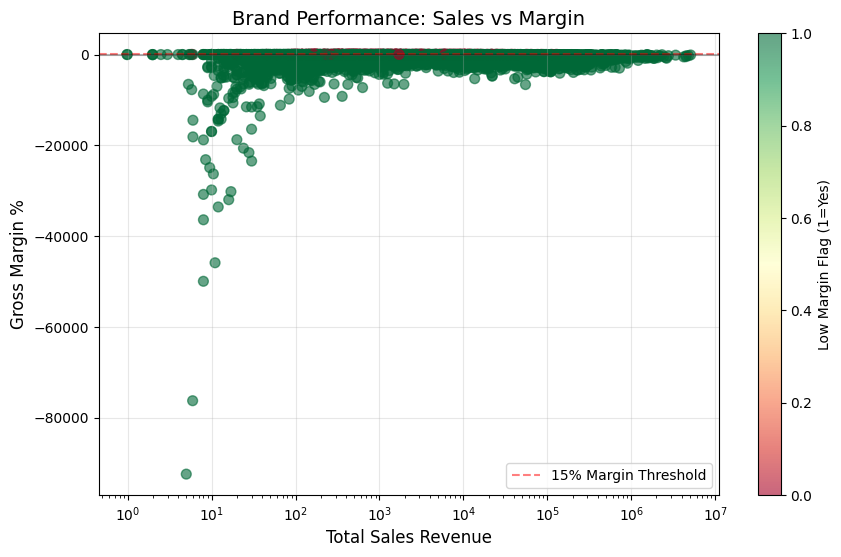

In [129]:
# Graph 1: Sales vs Margin Scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(brand_performance['TotalSales'],
                      brand_performance['GrossMarginPct'] * 100,
                      c=brand_performance['LowMarginFlag'],
                      cmap='RdYlGn', alpha=0.6, s=50)
plt.axhline(y=15, color='r', linestyle='--', alpha=0.5, label='15% Margin Threshold')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Total Sales Revenue', fontsize=12)
plt.ylabel('Gross Margin %', fontsize=12)
plt.title('Brand Performance: Sales vs Margin', fontsize=14)
plt.xscale('log')  # Use log scale due to wide sales distribution
plt.colorbar(scatter, label='Low Margin Flag (1=Yes)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [131]:
pl.Config.set_tbl_rows(20)
top_underperformers = brand_performance.filter(
    (pl.col('GrossMarginPct') < 0) |
    (pl.col('LowSalesHighInventoryFlag') == 1)
).sort('GrossMarginPct').head(20)
print("Top 20 Underperforming Brands:")
print(top_underperformers.select(['Brand', 'TotalSales', 'GrossMarginPct',
                                  'AvgInventoryTurnover', 'LowMarginFlag']))

Top 20 Underperforming Brands:
shape: (20, 5)
┌───────┬────────────┬────────────────┬──────────────────────┬───────────────┐
│ Brand ┆ TotalSales ┆ GrossMarginPct ┆ AvgInventoryTurnover ┆ LowMarginFlag │
│ ---   ┆ ---        ┆ ---            ┆ ---                  ┆ ---           │
│ i64   ┆ f64        ┆ f64            ┆ f64                  ┆ i32           │
╞═══════╪════════════╪════════════════╪══════════════════════╪═══════════════╡
│ 27934 ┆ 4.99       ┆ -924.214429    ┆ null                 ┆ 1             │
│ 8729  ┆ 5.94       ┆ -762.515152    ┆ 6.0                  ┆ 1             │
│ 41169 ┆ 7.98       ┆ -499.457393    ┆ null                 ┆ 1             │
│ 17331 ┆ 10.99      ┆ -458.676979    ┆ null                 ┆ 1             │
│ 4295  ┆ 7.99       ┆ -363.974969    ┆ null                 ┆ 1             │
│ 819   ┆ 11.99      ┆ -335.689741    ┆ null                 ┆ 1             │
│ 25224 ┆ 15.99      ┆ -319.771107    ┆ null                 ┆ 1             │
│ 1642

**Insights -**
* The scatter plot shows that a significant proportion of brands operate below the 15% gross margin threshold, with many brands exhibiting negative gross margins, indicating that these products are being sold at a loss.
* Several brands cluster in the low-sales, highly negative-margin region, suggesting that these brands generate minimal revenue while actively destroying profitability, making them strong candidates for discontinuation.
* A number of brands with relatively high total sales still fall below the acceptable margin threshold, indicating that volume alone is not translating into profitability, likely due to high purchase costs, freight impact, or aggressive pricing.
* Most underperforming brands are flagged due to low margins rather than low inventory turnover, suggesting that cost and pricing inefficiencies are a larger problem than demand for these products.

**Recommendation**
* Brands with persistently negative margins and low sales volume should be reviewed for delisting or replacement, as they consume operational effort while reducing overall profitability.
* High-revenue brands operating below the margin threshold should be prioritized for vendor renegotiation, freight optimization, or retail price adjustments to convert volume into profit.
* Brands with positive margins but moderate sales present opportunities for targeted promotions, as they can scale profitably without increasing cost risk.

In [138]:
pl.Config.restore_defaults()

polars.config.Config

### **OBJECTIVE 2: Top Vendors by Sales & Gross Profit**

In [115]:
brand_vendor_map = (
    vendor_cost_master
    .select(["Brand", "VendorNumber", "VendorName"])
    .unique())

sales_margin_with_vendor = (
    sales_purchase_margin_master
    .join(brand_vendor_map, on="Brand", how="left"))

vendor_profitability = (
    sales_margin_with_vendor
    .group_by(["VendorNumber", "VendorName"])
    .agg([
        pl.sum("TotalSalesRevenue").alias("VendorSales"),
        pl.sum("GrossProfit").alias("VendorGrossProfit")
    ])
    .with_columns([
        (pl.col("VendorSales") / pl.col("VendorSales").sum())
            .alias("RevenueContributionPct"),
        (pl.col("VendorGrossProfit") / pl.col("VendorGrossProfit").sum())
            .alias("ProfitContributionPct")]))

In [116]:
vendor_profitability

VendorNumber,VendorName,VendorSales,VendorGrossProfit,RevenueContributionPct,ProfitContributionPct
i64,str,f64,f64,f64,f64
653,"""STATE WINE & SPIRITS""",2.2938e6,-994399.13,0.005051,0.000364
3924,"""HEAVEN HILL DISTILLERIES""",3.8182e6,-1.0442e7,0.008408,0.003823
9744,"""FREDERICK WILDMAN & SONS""",1.2098e6,-1.7916e6,0.002664,0.000656
5992,"""MCCORMICK DISTILLING CO""",385182.16,-152629.53,0.000848,0.000056
90011,"""FORTUNE WINE BROKERS LLC""",72842.01,8897.29,0.00016,-0.000003
…,…,…,…,…,…
1273,"""CALEDONIA SPIRITS INC""",278648.38,-63151.37,0.000614,0.000023
7154,"""PREMIER DISTRIBUTORS""",109091.34,-90932.02,0.00024,0.000033
4425,"""MARTIGNETTI COMPANIES""",4.1077e7,-3.3161e8,0.090459,0.121405


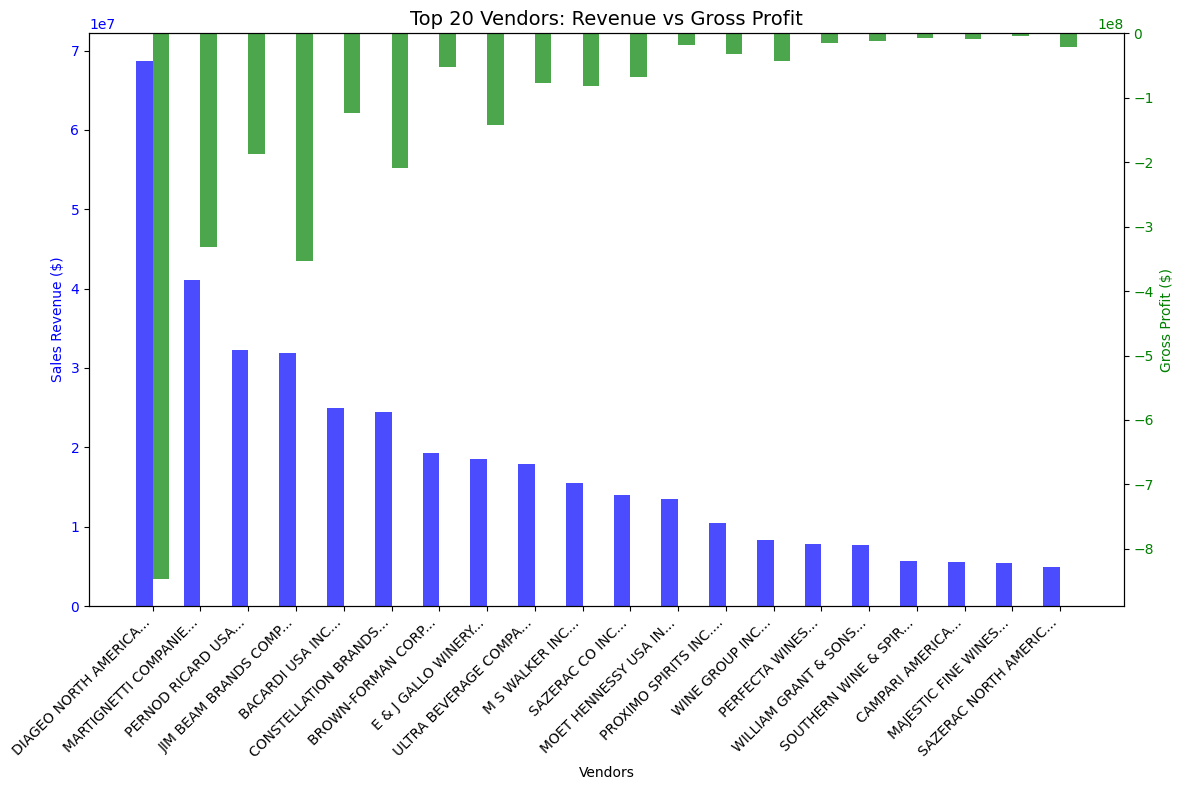

In [133]:
# Graph 1: Top 20 Vendors Revenue vs Profit
top_vendors = vendor_profitability.sort('VendorSales', descending=True).head(20)

fig, ax1 = plt.subplots(figsize=(12, 8))
x = np.arange(len(top_vendors))
width = 0.35

bars1 = ax1.bar(x - width/2, top_vendors['VendorSales'], width,
                label='Sales Revenue', color='blue', alpha=0.7)
ax1.set_xlabel('Vendors')
ax1.set_ylabel('Sales Revenue ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(top_vendors['VendorName'].str.slice(0, 20) + '...', rotation=45, ha='right')

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, top_vendors['VendorGrossProfit'], width,
                label='Gross Profit', color='green', alpha=0.7)
ax2.set_ylabel('Gross Profit ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.5)

plt.title('Top 20 Vendors: Revenue vs Gross Profit', fontsize=14)
fig.tight_layout()
plt.show()

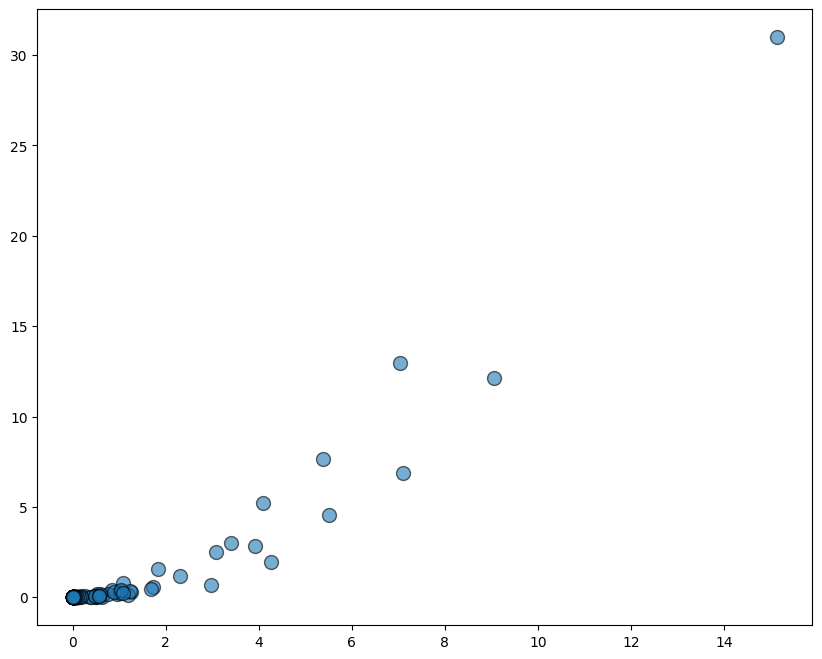

In [134]:
plt.figure(figsize=(10, 8))
plt.scatter(vendor_profitability['RevenueContributionPct'] * 100,
            vendor_profitability['ProfitContributionPct'] * 100,
            alpha=0.6, s=100, edgecolors='k')

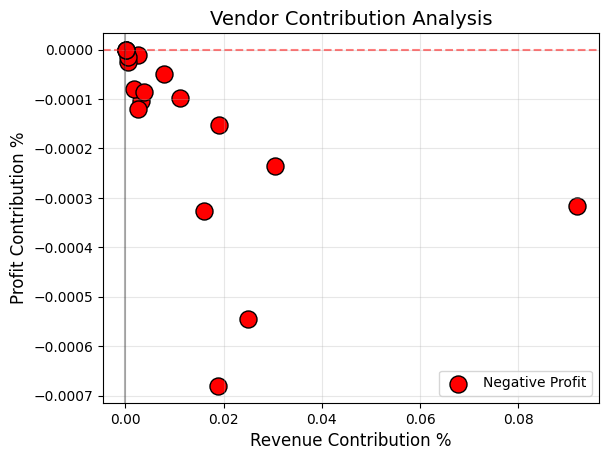

In [135]:
problem_vendors = vendor_profitability.filter(pl.col('ProfitContributionPct') < 0)
plt.scatter(problem_vendors['RevenueContributionPct'] * 100,
            problem_vendors['ProfitContributionPct'] * 100,
            color='red', s=150, label='Negative Profit', edgecolors='k')

plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Revenue Contribution %', fontsize=12)
plt.ylabel('Profit Contribution %', fontsize=12)
plt.title('Vendor Contribution Analysis', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Insights -**
* The bar chart reveals that while a few vendors generate extremely high sales volumes, many of them operate at significant gross losses, indicating that revenue concentration alone is masking profitability issues.
* Vendors such as Martignetti Companies and other top sellers contribute a substantial share of total revenue but simultaneously account for disproportionately large gross losses, amplifying overall margin erosion.
* The vendor mix appears volume-driven rather than profit-driven, suggesting that current purchasing and pricing strategies prioritize sales growth at the expense of sustainable margins.
* The scatter plot clearly shows that multiple vendors contribute positively to revenue while contributing negatively to profit, confirming a systemic revenue–profit mismatch across the vendor base.
* Certain vendors maintain a non-trivial revenue contribution while consistently generating losses, indicating that scale is amplifying inefficiencies rather than offsetting them.
* Only a limited number of vendors fall into the positive revenue and positive profit quadrant, highlighting an opportunity to rebalance sourcing strategies toward consistently profitable partners.

**Recommendations**
* Shift procurement focus from pure revenue contribution to profit-adjusted vendor performance, prioritizing vendors that consistently generate positive gross margins.
* High-volume vendors with negative margins should be targeted for price renegotiation, freight optimization, or revised discount structures to convert scale into profitability.
* Vendors that consistently contribute to losses despite moderate revenue share should be gradually deprioritized or replaced to reduce margin dilution risk.

### **OBJECTIVE 3: Bulk Purchasing Impact on Unit Cost**

In [118]:
vendor_cost_master = vendor_cost_master.with_columns(
    pl.when(pl.col("Quantity") <= 50)
      .then(pl.lit("Small"))
    .when(pl.col("Quantity") <= 500)
      .then(pl.lit("Medium"))
    .otherwise(pl.lit("Bulk"))
    .alias("PurchaseBucket")
)

In [119]:
bulk_impact = (
    vendor_cost_master
    .group_by("PurchaseBucket")
    .agg([
        pl.mean("TrueUnitCost").alias("AvgTrueUnitCost"),
        pl.count().alias("OrderCount")]))

/tmp/ipython-input-3335544134.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("OrderCount")]))


In [120]:
bulk_impact

PurchaseBucket,AvgTrueUnitCost,OrderCount
str,f64,u32
"""Medium""",25.266812,99391
"""Small""",190.785868,2272780
"""Bulk""",16.155502,303


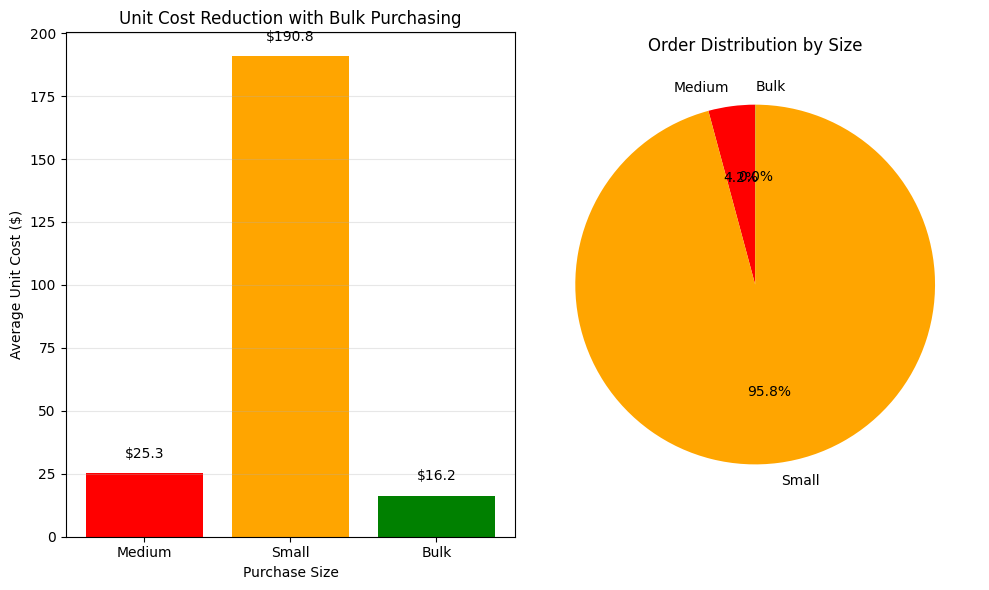


💰 SAVINGS OPPORTUNITY:
Bulk purchasing reduces unit cost by 91.5%
Small → Bulk: $190.8 → $16.2

📊 Recommendation: Consolidate small orders into bulk where possible


In [137]:
# Graph 1: Unit Cost by Purchase Size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Bar chart for unit cost
bars = ax1.bar(bulk_impact['PurchaseBucket'], bulk_impact['AvgTrueUnitCost'],
               color=['red', 'orange', 'green'])
ax1.set_xlabel('Purchase Size')
ax1.set_ylabel('Average Unit Cost ($)')
ax1.set_title('Unit Cost Reduction with Bulk Purchasing', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'${height:.1f}', ha='center', va='bottom')

# Pie chart for order distribution
ax2.pie(bulk_impact['OrderCount'], labels=bulk_impact['PurchaseBucket'],
        autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'green'])
ax2.set_title('Order Distribution by Size', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate savings opportunity
small_avg_cost = bulk_impact.filter(pl.col('PurchaseBucket') == 'Small')['AvgTrueUnitCost'][0]
bulk_avg_cost = bulk_impact.filter(pl.col('PurchaseBucket') == 'Bulk')['AvgTrueUnitCost'][0]
savings_pct = ((small_avg_cost - bulk_avg_cost) / small_avg_cost) * 100

print(f"\n💰 SAVINGS OPPORTUNITY:")
print(f"Bulk purchasing reduces unit cost by {savings_pct:.1f}%")
print(f"Small → Bulk: ${small_avg_cost:.1f} → ${bulk_avg_cost:.1f}")
print(f"\n📊 Recommendation: Consolidate small orders into bulk where possible")

**Insights -**
* The bar chart shows a sharp decline in average unit cost as purchase size increases, with bulk purchases averaging $16.2 per unit, compared to $190.8 for small orders and $25.3 for medium orders.
* Bulk purchasing reduces unit cost by approximately 91.5% compared to small orders, demonstrating that fragmented purchasing is one of the largest drivers of cost inefficiency in the supply chain.
* The pie chart reveals that over 95% of all purchase orders are small-sized, while bulk orders represent less than 1% of total orders, indicating that the organization is severely underutilizing bulk purchasing.
* Despite clear financial benefits, bulk purchasing is rarely used, suggesting that current procurement practices prioritize convenience, decentralization, or short-term replenishment over cost optimization.

**Recommendations**
* Wherever operationally feasible, small orders should be aggregated into bulk purchases to capture significant unit cost reductions and improve margin performance.
* Establish vendor-specific minimum order thresholds to discourage inefficient small purchases and standardize cost-efficient buying behavior.
* High-frequency SKUs should be managed through centralized or scheduled bulk ordering, reducing ad-hoc purchasing and enabling predictable cost savings.
* Savings achieved through bulk purchasing can be strategically reinvested into competitive pricing, promotions, or margin recovery without increasing risk.

### **OBJECTIVE 4: Inventory Turnover & Holding Cost Risk**

In [122]:
vendor_cost_master = vendor_cost_master.with_columns(
    pl.when(pl.col("Dollars") > 0)
      .then(pl.col("Freight") / pl.col("Dollars"))
      .otherwise(None)
      .alias("FreightPct"))

In [123]:
vendor_variance = (
    vendor_cost_master
    .group_by("VendorNumber")
    .agg([
        pl.mean("TrueUnitCost").alias("AvgUnitCost"),
        pl.std("TrueUnitCost").alias("UnitCostStd"),
        pl.mean("FreightPct").alias("AvgFreightPct"),
        pl.mean("LeadTime_days").alias("AvgLeadTime"),
        pl.std("LeadTime_days").alias("LeadTimeStd")]))

In [124]:
inventory_risk_summary = (
    inventory_turnover_master
    .group_by("Brand")
    .agg([
        pl.mean("InventoryTurnover").alias("AvgTurnover"),
        pl.sum("DeadStockFlag").alias("DeadStockSKUs"),
        pl.sum("OverstockFlag").alias("OverstockSKUs")]))

In [125]:
inventory_risk_summary

Brand,AvgTurnover,DeadStockSKUs,OverstockSKUs
i64,f64,i32,i32
18380,2.074815,1,15
23464,12.169878,0,17
9388,4.891075,1,46
27808,4.694818,0,44
23101,2.0,25,0
…,…,…,…
37712,5.342657,0,0
20953,0.782609,0,1
19486,2.959014,0,17


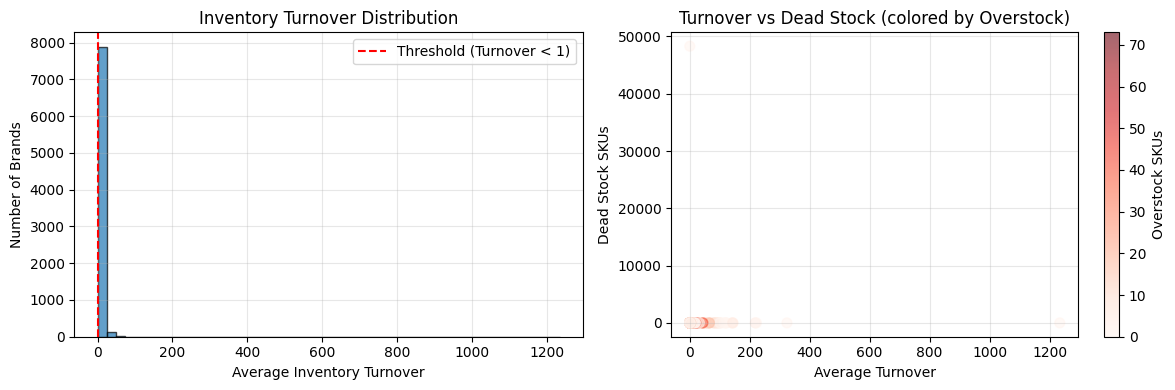

In [142]:
# Graph 1: Inventory Turnover Distribution
plt.figure(figsize=(12,4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(inventory_risk_summary['AvgTurnover'].drop_nulls(), bins=50,
         edgecolor='black', alpha=0.7)
plt.axvline(x=1, color='r', linestyle='--', label='Threshold (Turnover < 1)')
plt.xlabel('Average Inventory Turnover')
plt.ylabel('Number of Brands')
plt.title('Inventory Turnover Distribution', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Scatter: Turnover vs Dead Stock
plt.subplot(1, 2, 2)
plt.scatter(inventory_risk_summary['AvgTurnover'],
            inventory_risk_summary['DeadStockSKUs'],
            alpha=0.6, c=inventory_risk_summary['OverstockSKUs'],
            cmap='Reds', s=50)
plt.xlabel('Average Turnover')
plt.ylabel('Dead Stock SKUs')
plt.title('Turnover vs Dead Stock (colored by Overstock)', fontsize=12)
plt.colorbar(label='Overstock SKUs')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

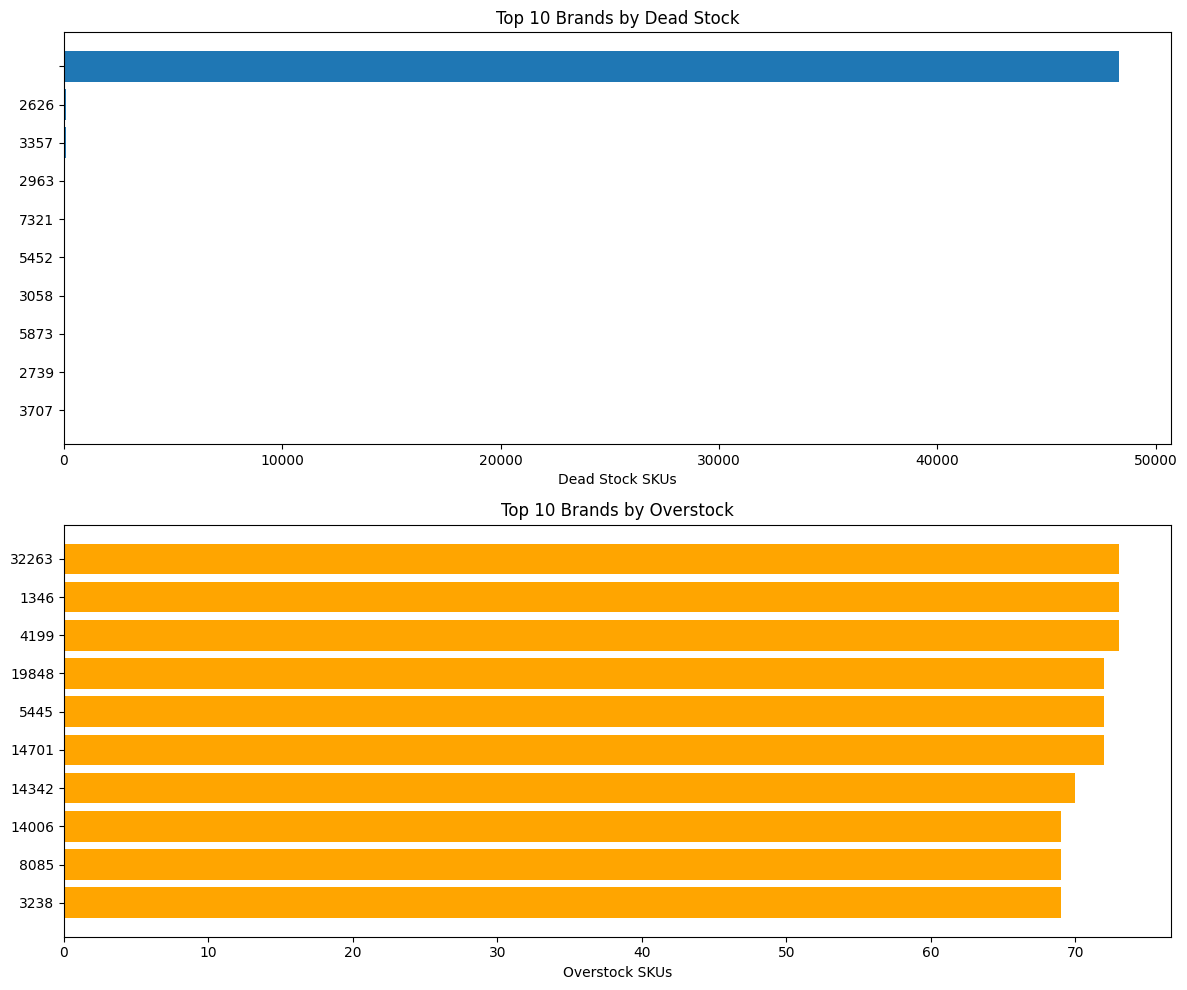

In [144]:
top_dead_stock = inventory_risk_summary.sort('DeadStockSKUs', descending=True).head(10)
top_overstock = inventory_risk_summary.sort('OverstockSKUs', descending=True).head(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.barh(range(len(top_dead_stock)), top_dead_stock['DeadStockSKUs'])
ax1.set_yticks(range(len(top_dead_stock)))
ax1.set_yticklabels(top_dead_stock['Brand'])
ax1.set_xlabel('Dead Stock SKUs')
ax1.set_title('Top 10 Brands by Dead Stock', fontsize=12)
ax1.invert_yaxis()

ax2.barh(range(len(top_overstock)), top_overstock['OverstockSKUs'], color='orange')
ax2.set_yticks(range(len(top_overstock)))
ax2.set_yticklabels(top_overstock['Brand'])
ax2.set_xlabel('Overstock SKUs')
ax2.set_title('Top 10 Brands by Overstock', fontsize=12)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()


**Insights -**
* The histogram shows that a large proportion of brands cluster near low inventory turnover, with a significant number operating at or below the critical threshold of turnover < 1, indicating slow-moving inventory and elevated holding costs.
* The scatter plot reveals that brands with lower average turnover tend to accumulate higher levels of dead stock, confirming that slow movement directly translates into unsold and obsolete inventory.
* Brands with higher overstock counts (darker red points) are concentrated in the low-to-moderate turnover range, indicating that excess purchasing amplifies dead stock risk even when some sales activity exists.
* The “Top 10 Brands by Dead Stock” chart shows that a small subset of brands accounts for a disproportionately large share of dead stock SKUs, suggesting that targeted interventions could yield significant inventory cost reductions.
* Unlike dead stock, overstock is spread across multiple brands with moderate to high counts, indicating systemic replenishment planning issues rather than isolated demand failures.

**Recommendations**
* Brands with average turnover below 1 should be placed on restricted reorder policies until existing inventory levels normalize.
* Brands with high dead stock counts should be prioritized for clearance sales, markdowns, or SKU rationalization to free up working capital.
* Brands appearing in the top overstock list should undergo recalibration of safety stock and reorder points, especially where demand variability is low.
* A recurring dashboard tracking turnover, dead stock, and overstock flags by brand should be implemented to proactively identify holding-cost risks.

### **OBJECTIVE 5: Profitability Variance Across Vendors**

In [126]:
vendor_variance = (
    vendor_cost_master
    .group_by("VendorNumber")
    .agg([
        pl.mean("TrueUnitCost").alias("AvgUnitCost"),
        pl.std("TrueUnitCost").alias("UnitCostStd"),
        pl.mean("FreightPct").alias("AvgFreightPct"),
        pl.mean("LeadTime_days").alias("AvgLeadTime"),
        pl.std("LeadTime_days").alias("LeadTimeStd")]))

In [127]:
vendor_variance

VendorNumber,AvgUnitCost,UnitCostStd,AvgFreightPct,AvgLeadTime,LeadTimeStd
i64,f64,f64,f64,f64,f64
9260,35.672825,63.243243,1.856393,7.85259,2.255257
172662,23.707368,5.811349,0.126623,7.738255,2.166689
4901,4.884828,null,0.005109,10.0,null
3252,144.508654,158.465102,20.704863,7.619708,2.276218
9751,22.972857,0.14674,0.011129,8.818182,2.00709
…,…,…,…,…,…
201359,17.09,null,0.005294,13.0,null
660,79.399948,121.745695,9.681094,7.506506,2.22907
9622,29.700203,40.198646,0.900571,7.126866,2.022646


High Risk Vendors (Cost or Lead Time Volatility):
shape: (5, 5)
┌──────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ VendorNumber ┆ AvgUnitCost ┆ UnitCostStd ┆ AvgLeadTime ┆ LeadTimeStd │
│ ---          ┆ ---         ┆ ---         ┆ ---         ┆ ---         │
│ i64          ┆ f64         ┆ f64         ┆ f64         ┆ f64         │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 3960         ┆ 496.266099  ┆ 673.527418  ┆ 7.549649    ┆ 2.191179    │
│ 4425         ┆ 259.806889  ┆ 384.107874  ┆ 7.786131    ┆ 2.17176     │
│ 17035        ┆ 283.388855  ┆ 357.685242  ┆ 7.56095     ┆ 2.175478    │
│ 6280         ┆ 135.563758  ┆ 349.506228  ┆ 8.3125      ┆ 2.182315    │
│ 12546        ┆ 305.033596  ┆ 345.617148  ┆ 7.512969    ┆ 2.396197    │
└──────────────┴─────────────┴─────────────┴─────────────┴─────────────┘


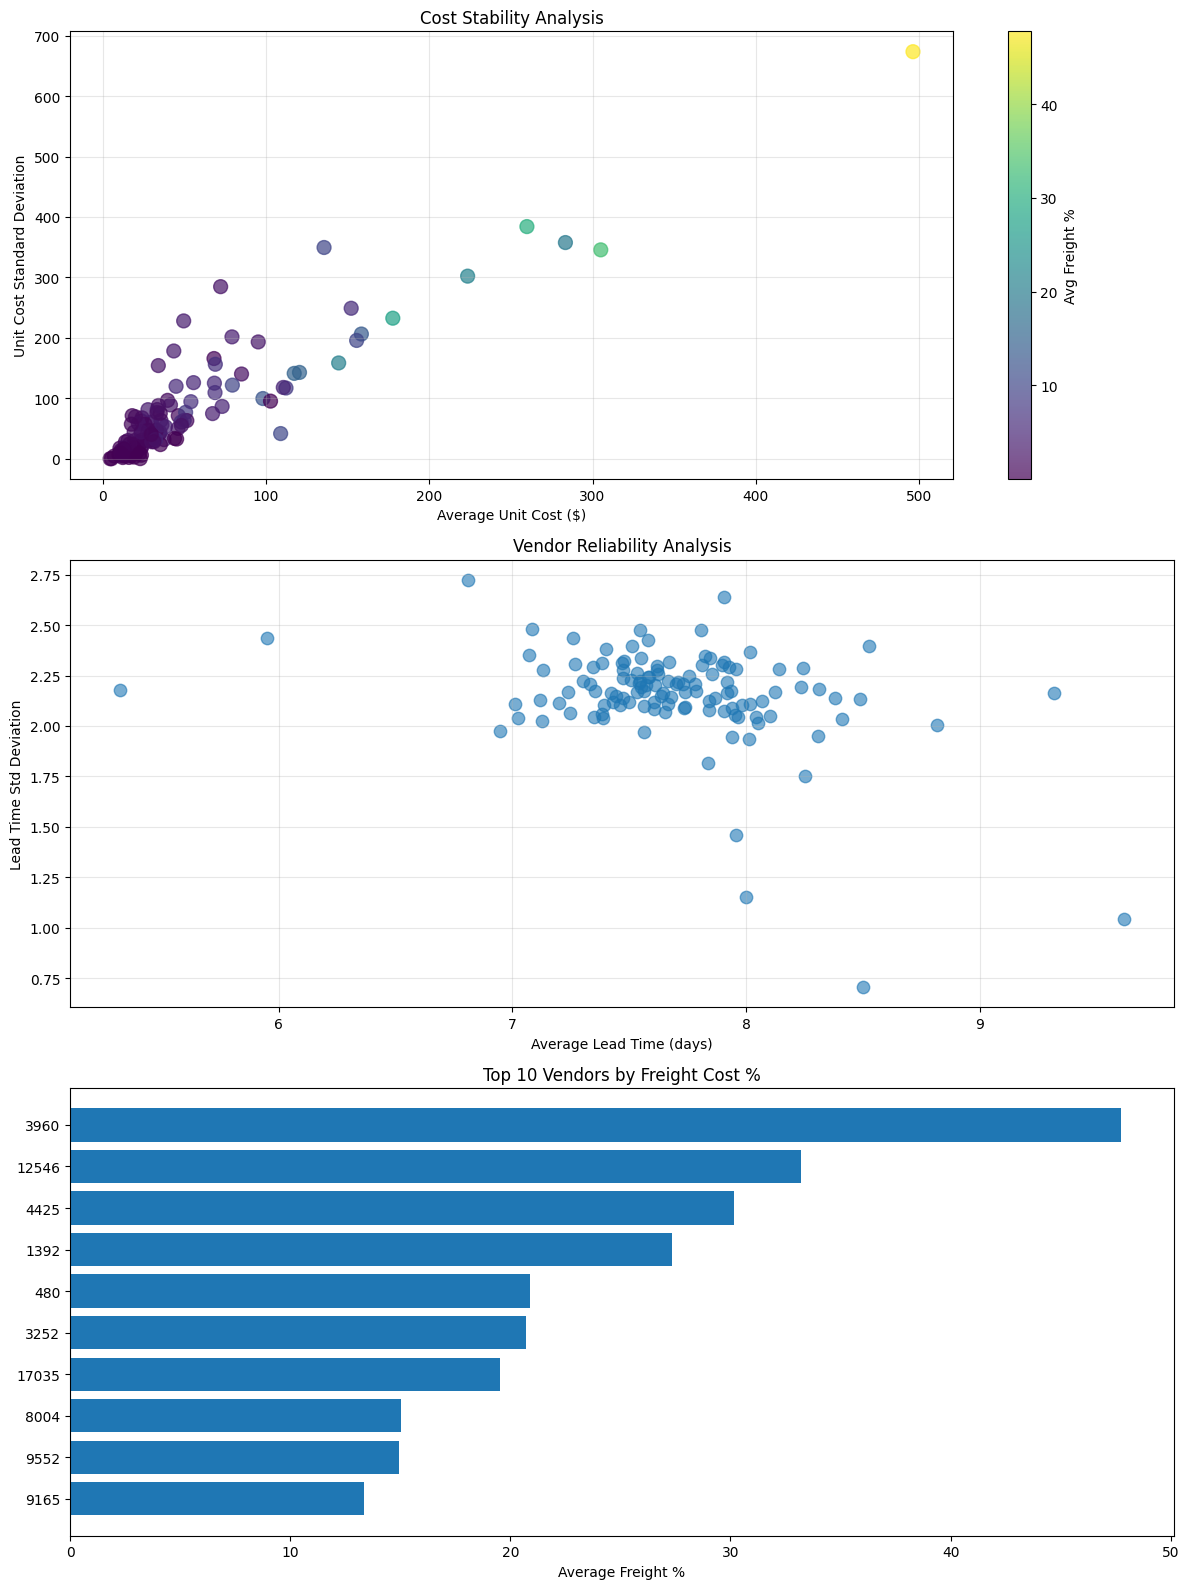

In [150]:
plt.figure(figsize=(12, 16))

plt.subplot(3, 1, 1)
scatter = plt.scatter(vendor_variance['AvgUnitCost'],
                      vendor_variance['UnitCostStd'],
                      c=vendor_variance['AvgFreightPct'],
                      cmap='viridis', s=100, alpha=0.7)
plt.xlabel('Average Unit Cost ($)')
plt.ylabel('Unit Cost Standard Deviation')
plt.title('Cost Stability Analysis', fontsize=12)
plt.colorbar(scatter, label='Avg Freight %')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.scatter(vendor_variance['AvgLeadTime'],
            vendor_variance['LeadTimeStd'],
            alpha=0.6, s=80)
plt.xlabel('Average Lead Time (days)')
plt.ylabel('Lead Time Std Deviation')
plt.title('Vendor Reliability Analysis', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
top_freight = vendor_variance.sort('AvgFreightPct', descending=True).head(10)
plt.barh(range(len(top_freight)), top_freight['AvgFreightPct'])
plt.yticks(range(len(top_freight)), top_freight['VendorNumber'])
plt.xlabel('Average Freight %')
plt.title('Top 10 Vendors by Freight Cost %', fontsize=12)
plt.gca().invert_yaxis()

print("High Risk Vendors (Cost or Lead Time Volatility):")
print(high_volatility.select(['VendorNumber', 'AvgUnitCost', 'UnitCostStd',
                              'AvgLeadTime', 'LeadTimeStd']))

plt.tight_layout()
plt.show()

**Insights -**
* The cost stability scatter plot shows a wide dispersion in unit cost volatility, with several vendors exhibiting extremely high standard deviations relative to their average unit cost, indicating unstable pricing behavior.
* Vendors positioned in the upper-right quadrant of the cost stability chart demonstrate both high average unit costs and high cost variability, making them financially risky partners, especially for high-volume SKUs.
* Vendors with elevated average freight percentages are disproportionately represented among high cost-variance vendors, suggesting that logistics inefficiencies significantly contribute to margin instability.
* While most vendors have similar average lead times (around 7–8 days), lead time variability differs meaningfully, indicating that delivery reliability—not speed—is the primary operational risk factor.
* The identified high-risk vendors exhibit extreme cost volatility and inconsistent lead times, making them outsized contributors to operational and financial uncertainty, despite representing a small fraction of the vendor base.

**Recommendations**
* Vendor evaluation should incorporate cost volatility, freight impact, and lead-time variability, not just average unit cost or total spend.
* High-risk vendors should be targeted for price stabilization clauses, freight cost caps, or long-term rate agreements to reduce margin uncertainty.
* Where possible, sourcing should be diversified or shifted toward vendors with lower cost and delivery variability, even if their average unit cost is marginally higher.
* Vendors with high lead-time variability should have adjusted safety stock policies, while reliable vendors can support leaner inventory models.